In [1]:
import pandas as pd 
import numpy as np 
import warnings

# Ignore the specific ParserWarning
warnings.simplefilter(action='ignore', category=pd.errors.ParserWarning)
# Load the dataset 
df = pd.read_csv('reviews.csv',index_col=False) 

In [3]:
df.shape[0]

3369

In [4]:
df.head()

,customer_name,rating,review_title,review_text,review_date,product_name
0,ARUN,5.0,Very Great Processor . . .,The processor was very power efficient i devel...,Reviewed in India on 24 April 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
1,Ayush,5.0,Got it under 10k,Try to get it under 10k and check the rankings...,Reviewed in India on 14 May 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
2,Hruaia,5.0,Highest Price to Performance processor for gam...,I upgrade from 9400f. The performance gain is ...,Reviewed in India on 24 March 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
3,Yavvari,4.0,No discrete graphics in this processor,"This will not work without graphic card, So be...",Reviewed in India on 18 February 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
4,Mr.GeAr,5.0,Nice processor under 12k,Best 👌 gaming and multitasking processor at th...,Reviewed in India on 7 April 2024,Intel Core I5 12400F 12 Gen Generation Desktop...


In [2]:
duplicated_rows = df.duplicated().sum()
print(duplicated_rows," Duplicated Rows")

226  Duplicated Rows


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3369 entries, 0 to 3368
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_name  3369 non-null   object 
 1   rating         3369 non-null   float64
 2   review_title   363 non-null    object 
 3   review_text    3316 non-null   object 
 4   review_date    3369 non-null   object 
 5   product_name   3369 non-null   object 
dtypes: float64(1), object(5)
memory usage: 158.1+ KB


In [3]:
# Categorical columns 
cat_col = [col for col in df.columns if df[col].dtype == 'object'] 
print('Categorical columns :',cat_col) 
# Numerical columns 
num_col = [col for col in df.columns if df[col].dtype != 'object'] 
print('Numerical columns :',num_col)


Categorical columns : ['customer_name', 'review_title', 'review_text', 'review_date', 'product_name']
Numerical columns : ['rating']


In [4]:
df[cat_col].nunique()

customer_name    2457
review_title      296
review_text      2760
review_date      2052
product_name       58
dtype: int64

In [5]:
df['product_name'].unique()

array(['Intel Core I5 12400F 12 Gen Generation Desktop Pc Processor 6',
       'Intel Core I5 12400F 12 Gen Generation Desktop Pc Processor 6 CPU with 18Mb Cache and Up to 4.40 Ghz Clock Speed Ddr5 and Ddr4 Ram Support Lga 1700 Socket Micro ATX',
       'Intel Core i5-12600K Desktop Processor 10 (6P+4E) Cores up to 4.9 GHz Unlocked Socket LGA 1700 600 Series Chipset 125W',
       'Intel Core I5-13400F Processor 20M Cache Up to 4.60 Ghz LGA 1700',
       "Intel Core i5-13600K Desktop Processor 14 cores (6 P-cores + 8 E-cores) 24M Cache up to 5.1 GHz' Socket LGA 1700",
       'Intel Core I5-13400 Processor 20M Cache Up to 4.60 Ghz LGA 1700',
       'Intel Core i5-13500 Processor LGA 1700 24M Cache up to 4.80 GHz',
       'Intel Core I5-13600K Processor 24M Cache Up to 5.10 Ghz LGA 1700',
       'Intel® Core™ i5-13600KF Processor 24M Cache up to 5.10 GHz',
       "Intel Core i5-13600KF Desktop Processor 14 cores (6 P-cores + 8 E-cores) 24M Cache up to 5.1 GHz' LGA 1700",
       'Intel Cor

In [7]:
# if you want to drop columns
# df1 = df.drop(columns=['Name','Ticket']) 
# df1.shape

In [2]:
# null values percentage in each column
round((df.isnull().sum()/df.shape[0])*100,2)

customer_name     0.00
rating            0.00
review_title     89.23
review_text       1.57
review_date       0.00
product_name      0.00
dtype: float64

In [2]:
# We will drop the review_title column. 
# We drop the null values rows of review_text column.
df1 = df.drop(columns='review_title') 
df1.dropna(subset=['review_text'], axis=0, inplace=True) 
df1.shape

(3316, 5)

In [12]:
df1

,customer_name,rating,review_text,review_date,product_name
0,ARUN,5.0,The processor was very power efficient i devel...,Reviewed in India on 24 April 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
1,Ayush,5.0,Try to get it under 10k and check the rankings...,Reviewed in India on 14 May 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
2,Hruaia,5.0,I upgrade from 9400f. The performance gain is ...,Reviewed in India on 24 March 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
3,Yavvari,4.0,"This will not work without graphic card, So be...",Reviewed in India on 18 February 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
4,Mr.GeAr,5.0,Best 👌 gaming and multitasking processor at th...,Reviewed in India on 7 April 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
...,...,...,...,...,...
3364,Leroy Dodd,5.0,The processor can in fine. I thought I was bei...,Reviewed in the United States on 14 April 2024,Intel Core i3-14100F Desktop Processor 4 cores...
3365,cathyesq,5.0,My son recently upgraded his computer and we b...,Reviewed in the United States on 26 March 2024,Intel Core i3-14100F Desktop Processor 4 cores...
3366,Jon281,5.0,A friend told me he was running Tekken 8 on a ...,Reviewed in the United States on 20 February 2024,Intel Core i3-14100F Desktop Processor 4 cores...
3367,Jorge Mendoza,5.0,Worked perfectly for fortnite and comes with a...,Reviewed in the United States on 26 February 2024,Intel Core i3-14100F Desktop Processor 4 cores...


In [13]:
df

,customer_name,rating,review_title,review_text,review_date,product_name
0,ARUN,5.0,Very Great Processor . . .,The processor was very power efficient i devel...,Reviewed in India on 24 April 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
1,Ayush,5.0,Got it under 10k,Try to get it under 10k and check the rankings...,Reviewed in India on 14 May 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
2,Hruaia,5.0,Highest Price to Performance processor for gam...,I upgrade from 9400f. The performance gain is ...,Reviewed in India on 24 March 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
3,Yavvari,4.0,No discrete graphics in this processor,"This will not work without graphic card, So be...",Reviewed in India on 18 February 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
4,Mr.GeAr,5.0,Nice processor under 12k,Best 👌 gaming and multitasking processor at th...,Reviewed in India on 7 April 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
...,...,...,...,...,...,...
3364,Leroy Dodd,5.0,Big dummy,The processor can in fine. I thought I was bei...,Reviewed in the United States on 14 April 2024,Intel Core i3-14100F Desktop Processor 4 cores...
3365,cathyesq,5.0,Son says this is great,My son recently upgraded his computer and we b...,Reviewed in the United States on 26 March 2024,Intel Core i3-14100F Desktop Processor 4 cores...
3366,Jon281,5.0,Cost/benefit ratio better than a comparable AMD,A friend told me he was running Tekken 8 on a ...,Reviewed in the United States on 20 February 2024,Intel Core i3-14100F Desktop Processor 4 cores...
3367,Jorge Mendoza,5.0,Great pc part works perfect,Worked perfectly for fortnite and comes with a...,Reviewed in the United States on 26 February 2024,Intel Core i3-14100F Desktop Processor 4 cores...


In [3]:
num_null_ratings = df1['rating'].isnull().sum()
print(f"Number of rows with null values in the 'rating' column: {num_null_ratings}")

Number of rows with null values in the 'rating' column: 0


In [11]:
# Calculate the mean, median, and standard deviation
mean_rating = df1['rating'].mean()
median_rating = df1['rating'].median()
std_rating = df1['rating'].std()

print(f"Mean rating: {mean_rating}")
print(f"Median rating: {median_rating}")
print(f"Standard Deviation of rating: {std_rating}")

Mean rating: 4.536791314837153
Median rating: 5.0
Standard Deviation of rating: 1.0633779608676706


In [5]:
rating_counts = df1['rating'].value_counts()
print(rating_counts)
print("\n--------- After sorting ---------\n")
rating_counts_sorted = rating_counts.sort_index(ascending=False)
print(rating_counts_sorted)

rating
5.0    2597
4.0     348
1.0     199
3.0     124
2.0      48
Name: count, dtype: int64

--------- After sorting ---------

rating
5.0    2597
4.0     348
3.0     124
2.0      48
1.0     199
Name: count, dtype: int64


In [13]:
specific_value = 4.0

# Count the number of rows with the specific value in the 'rating' column
num_specific_value = (df1['rating'] == specific_value).sum()
print(f"Number of rows with rating {specific_value}: {num_specific_value}")

Number of rows with rating 4.0: 348


In [14]:
# data with rating 2.0
rating_2_df = df1.loc[(df1['rating'] == 2.0) | (df1['rating'] == 1.0), ['product_name','rating','review_text','review_date']]
print("Rows with rating 2.0:")
print(rating_2_df)
#print(rating_2_df.to_string(index=False))

Rows with rating 2.0:
                                           product_name  rating  \
10    Intel Core I5 12400F 12 Gen Generation Desktop...     2.0   
11    Intel Core I5 12400F 12 Gen Generation Desktop...     1.0   
28    Intel Core I5 12400F 12 Gen Generation Desktop...     1.0   
33    Intel Core I5 12400F 12 Gen Generation Desktop...     1.0   
73    Intel Core I5 12400F 12 Gen Generation Desktop...     1.0   
...                                                 ...     ...   
3244  Intel® Core™ i3-13100F Processor 12M Cache up ...     1.0   
3248  Intel® Core™ i3-13100F Processor 12M Cache up ...     1.0   
3261  Intel Core i3-13100 Desktop Processor 4 cores ...     1.0   
3272  Intel Core i3-13100 Desktop Processor 4 cores ...     2.0   
3289  Intel Core i3-13100 Desktop Processor 4 cores ...     1.0   

                                            review_text  \
10    Find Different Stores And Buy This At 25000INR...   
11    The processor is Good But too expensive here I...

In [40]:
rating_2_df.to_csv('negative_reviews.csv', index=False)

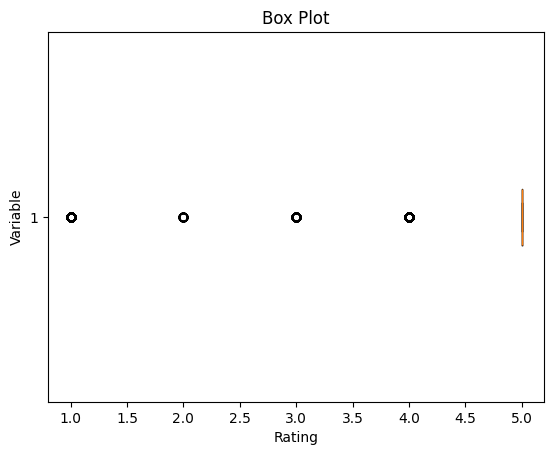

In [19]:
import matplotlib.pyplot as plt 

plt.boxplot(df1['rating'], vert=False) 
plt.ylabel('Variable') 
plt.xlabel('Rating') 
plt.title('Box Plot') 
plt.show()


In [6]:
# calculate summary statistics 
mean = df3['Age'].mean() 
std = df3['Age'].std() 

# Calculate the lower and upper bounds 
lower_bound = mean - std*2
upper_bound = mean + std*2

# Q1 = df[column_name].quantile(0.25)
# Q3 = df[column_name].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

print('Lower Bound :',lower_bound) 
print('Upper Bound :',upper_bound) 

# Drop the outliers 
df4 = df3[(df3['Age'] >= lower_bound) 
				& (df3['Age'] <= upper_bound)]

NameError: name 'df3' is not defined

In [4]:
df1 = df.drop(columns='review_title') 
df1.dropna(subset=['review_text'], axis=0, inplace=True) 
df1.shape

(3316, 5)

In [5]:
df1['date'] = pd.to_datetime(df['review_date'].str.extract(r'on\s(\d+\s\w+\s\d{4})', expand=False))
# df1['country'] = df1['review_date'].str.extract(r'Reviewed in\s(.*?)\s', expand=False)
# df1['country'] = df1['review_date'].str.extract(r'Reviewed in\s(.*)$', expand=False)
df1['country'] = df1['review_date'].str.extract(r'in\s(.*?)\son', expand=False)

# Dropping the original review_date column
df1.drop(columns=['review_date'], inplace=True)

print(df1)

      customer_name  rating  \
0              ARUN     5.0   
1             Ayush     5.0   
2            Hruaia     5.0   
3           Yavvari     4.0   
4           Mr.GeAr     5.0   
...             ...     ...   
3364     Leroy Dodd     5.0   
3365       cathyesq     5.0   
3366         Jon281     5.0   
3367  Jorge Mendoza     5.0   
3368         Hau Le     5.0   

                                            review_text  \
0     The processor was very power efficient i devel...   
1     Try to get it under 10k and check the rankings...   
2     I upgrade from 9400f. The performance gain is ...   
3     This will not work without graphic card, So be...   
4     Best 👌 gaming and multitasking processor at th...   
...                                                 ...   
3364  The processor can in fine. I thought I was bei...   
3365  My son recently upgraded his computer and we b...   
3366  A friend told me he was running Tekken 8 on a ...   
3367  Worked perfectly for fortnite a

In [9]:
duplicated_rows = df1.duplicated().sum()
print(duplicated_rows," Duplicated Rows")

229  Duplicated Rows


In [6]:
# drop duplicate rows based on all the columns
df_no_duplicates = df1.drop_duplicates()

#drop duplicate rows based on specific column only
# df_no_duplicates = df.drop_duplicates(subset=['A'])

In [7]:
duplicated_rows = df_no_duplicates.duplicated().sum()
print(duplicated_rows," Duplicated Rows")

0  Duplicated Rows


In [8]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
# Step 3: Normalize text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# df_no_duplicates['review_text'] = df_no_duplicates['review_text'].apply(clean_text)
df_no_duplicates.loc[:, 'review_text'] = df_no_duplicates['review_text'].apply(clean_text)


# Step 4: Perform sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(row):
    score = analyzer.polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        return "Negative"
    elif pos > neg:
        return "Positive"
    else:
        return "Neutral"

# df_no_duplicates['sentiment'] = df_no_duplicates['review_text'].apply(get_sentiment)
df_no_duplicates.loc[:, 'sentiment'] = df_no_duplicates['review_text'].apply(get_sentiment)


# Display the sentiment counts
sentiment_counts = df_no_duplicates['sentiment'].value_counts()
print(sentiment_counts)

# Display the dataframe with sentiments
print(df_no_duplicates.head())

sentiment
Positive    2405
Negative     369
Neutral      313
Name: count, dtype: int64
  customer_name  rating                                        review_text  \
0          ARUN     5.0  the processor was very power efficient i devel...   
1         Ayush     5.0  try to get it under k and check the rankings i...   
2        Hruaia     5.0  i upgrade from f the performance gain is a hug...   
3       Yavvari     4.0  this will not work without graphic card so be ...   
4       Mr.GeAr     5.0  best gaming and multitasking processor at the ...   

                                        product_name       date country  \
0  Intel Core I5 12400F 12 Gen Generation Desktop... 2024-04-24   India   
1  Intel Core I5 12400F 12 Gen Generation Desktop... 2024-05-14   India   
2  Intel Core I5 12400F 12 Gen Generation Desktop... 2024-03-24   India   
3  Intel Core I5 12400F 12 Gen Generation Desktop... 2024-02-18   India   
4  Intel Core I5 12400F 12 Gen Generation Desktop... 2024-04-07   Ind

C:\Users\Admin\AppData\Local\Temp\ipykernel_16320\4127296400.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates.loc[:, 'sentiment'] = df_no_duplicates['review_text'].apply(get_sentiment)


In [9]:
# Group by 'product_name' and 'sentiment', then count the occurrences of each sentiment category
sentiment_counts = df_no_duplicates.groupby(['product_name', 'sentiment'])['sentiment'].count()

# Unstack the grouped DataFrame to pivot 'sentiment' into columns
sentiment_counts = sentiment_counts.unstack(level=-1, fill_value=0)

# Rename the columns for clarity
sentiment_counts.columns = ['Negative', 'Neutral', 'Positive']

# Display the resulting DataFrame
print(sentiment_counts)

                                                    Negative  Neutral  \
product_name                                                            
Boxed INTEL I3-13100F 12M Cache UP to 4.50GHZ              4        2   
Intel CORE I3-12100F Desktop Processor Core Up ...        10        4   
Intel Core I3 (12Th Gen) I3-12100 Quad-Core (4 ...         3       11   
Intel Core I3-13100 Processor (12M Cache Up to ...         2        1   
Intel Core I5 12400F 12 Gen Generation Desktop ...         0        1   
Intel Core I5 12400F 12 Gen Generation Desktop ...        19       20   
Intel Core I5-13400 Processor 20M Cache Up to 4...         1        3   
Intel Core I5-13400F Processor 20M Cache Up to ...         8       11   
Intel Core I5-13600K Processor 24M Cache Up to ...         7        7   
Intel Core I7 12700Kf 12Th Gen Desktop Processo...        12       16   
Intel Core I7-13700F Desktop Processor 16 Cores...         2        2   
Intel Core I7-13700K Processor 30M Cache Up to ... 

In [23]:
df_no_duplicates['product_name'].unique()

array(['Intel Core I5 12400F 12 Gen Generation Desktop Pc Processor 6',
       'Intel Core I5 12400F 12 Gen Generation Desktop Pc Processor 6 CPU with 18Mb Cache and Up to 4.40 Ghz Clock Speed Ddr5 and Ddr4 Ram Support Lga 1700 Socket Micro ATX',
       'Intel Core i5-12600K Desktop Processor 10 (6P+4E) Cores up to 4.9 GHz Unlocked Socket LGA 1700 600 Series Chipset 125W',
       'Intel Core I5-13400F Processor 20M Cache Up to 4.60 Ghz LGA 1700',
       "Intel Core i5-13600K Desktop Processor 14 cores (6 P-cores + 8 E-cores) 24M Cache up to 5.1 GHz' Socket LGA 1700",
       'Intel Core I5-13400 Processor 20M Cache Up to 4.60 Ghz LGA 1700',
       'Intel Core i5-13500 Processor LGA 1700 24M Cache up to 4.80 GHz',
       'Intel Core I5-13600K Processor 24M Cache Up to 5.10 Ghz LGA 1700',
       'Intel® Core™ i5-13600KF Processor 24M Cache up to 5.10 GHz',
       "Intel Core i5-13600KF Desktop Processor 14 cores (6 P-cores + 8 E-cores) 24M Cache up to 5.1 GHz' LGA 1700",
       'Intel Cor

In [10]:
# Function to categorize the product_name
def categorize_product(name):
    name = name.lower()
    if 'i5' in name:
        if '12 gen' in name or 'i5-12' in name:
            return 'Intel i5 12th gen processor'
        elif 'i5-13' in name:
            return 'Intel i5 13th gen processor'
        elif 'i5-14' in name:
            return 'Intel i5 14th gen processor'
    elif 'i7' in name:
        if '12 gen' in name or '12th gen' in name or 'i7-12' in name:
            return 'Intel i7 12th gen processor'
        elif 'i7-13' in name:
            return 'Intel i7 13th gen processor'
        elif 'i7-14' in name:
            return 'Intel i7 14th gen processor'
    elif 'i9' in name:
        if 'i9-12' in name:
            return 'Intel i9 12th gen processor'
        elif 'i9-13' in name:
            return 'Intel i9 13th gen processor'
        elif 'i9-14' in name:
            return 'Intel i9 14th gen processor'
    elif 'i3' in name:
        if 'i3-12' in name or '12th gen' in name:
            return 'Intel i3 12th gen processor'
        elif 'i3-13' in name:
            return 'Intel i3 13th gen processor'
        elif 'i3-14' in name:
            return 'Intel i3 14th gen processor'
    return 'Other'

# Apply the function to categorize the product_name column
# df_no_duplicates['category'] = df_no_duplicates['product_name'].apply(categorize_product)
df_no_duplicates.loc[:, 'category'] = df_no_duplicates['product_name'].apply(categorize_product)

# Display the DataFrame
print(df_no_duplicates)

      customer_name  rating  \
0              ARUN     5.0   
1             Ayush     5.0   
2            Hruaia     5.0   
3           Yavvari     4.0   
4           Mr.GeAr     5.0   
...             ...     ...   
3364     Leroy Dodd     5.0   
3365       cathyesq     5.0   
3366         Jon281     5.0   
3367  Jorge Mendoza     5.0   
3368         Hau Le     5.0   

                                            review_text  \
0     the processor was very power efficient i devel...   
1     try to get it under k and check the rankings i...   
2     i upgrade from f the performance gain is a hug...   
3     this will not work without graphic card so be ...   
4     best gaming and multitasking processor at the ...   
...                                                 ...   
3364  the processor can in fine i thought i was bein...   
3365  my son recently upgraded his computer and we b...   
3366  a friend told me he was running tekken on a th...   
3367  worked perfectly for fortnite a

C:\Users\Admin\AppData\Local\Temp\ipykernel_16320\3454375506.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates.loc[:, 'category'] = df_no_duplicates['product_name'].apply(categorize_product)


In [15]:
df_no_duplicates['category'].unique()

array(['Intel i5 12th gen processor', 'Intel i5 13th gen processor',
       'Intel i5 14th gen processor', 'Intel i7 12th gen processor',
       'Intel i7 13th gen processor', 'Intel i7 14th gen processor',
       'Intel i9 12th gen processor', 'Intel i9 13th gen processor',
       'Intel i9 14th gen processor', 'Intel i3 12th gen processor',
       'Intel i3 13th gen processor', 'Intel i3 14th gen processor'],
      dtype=object)

In [11]:
# Group by 'product_name' and 'sentiment', then count the occurrences of each sentiment category
sentiment_counts = df_no_duplicates.groupby(['category', 'sentiment'])['sentiment'].count()

# Unstack the grouped DataFrame to pivot 'sentiment' into columns
sentiment_counts = sentiment_counts.unstack(level=-1, fill_value=0)

# Rename the columns for clarity
sentiment_counts.columns = ['Negative', 'Neutral', 'Positive']

# Display the resulting DataFrame
print(sentiment_counts)

                             Negative  Neutral  Positive
category                                                
Intel i3 12th gen processor        28       32       278
Intel i3 13th gen processor        19       18       116
Intel i3 14th gen processor         0        0         7
Intel i5 12th gen processor        28       29       186
Intel i5 13th gen processor        50       61       497
Intel i5 14th gen processor        14       12        95
Intel i7 12th gen processor        34       37       202
Intel i7 13th gen processor        28       28       271
Intel i7 14th gen processor        24       16       127
Intel i9 12th gen processor        31       18       162
Intel i9 13th gen processor        66       43       256
Intel i9 14th gen processor        47       19       208


In [19]:
import pandas as pd
import os
def save_to_csv(reviews, filename='reviews.csv'):
    df = pd.DataFrame(reviews)
    if os.path.isfile(filename):
        df.to_csv(filename, mode='a', header=False, index=False)
    else:
        df.to_csv(filename, index=False)

In [20]:
save_to_csv(sentiment_counts,"sentiment_counts.csv")

In [21]:
sentiment_counts

,Negative,Neutral,Positive
category,,,
Intel i3 12th gen processor,28,32,278
Intel i3 13th gen processor,19,18,116
Intel i3 14th gen processor,0,0,7
Intel i5 12th gen processor,28,29,186
Intel i5 13th gen processor,50,61,497
Intel i5 14th gen processor,14,12,95
Intel i7 12th gen processor,34,37,202
Intel i7 13th gen processor,28,28,271
Intel i7 14th gen processor,24,16,127


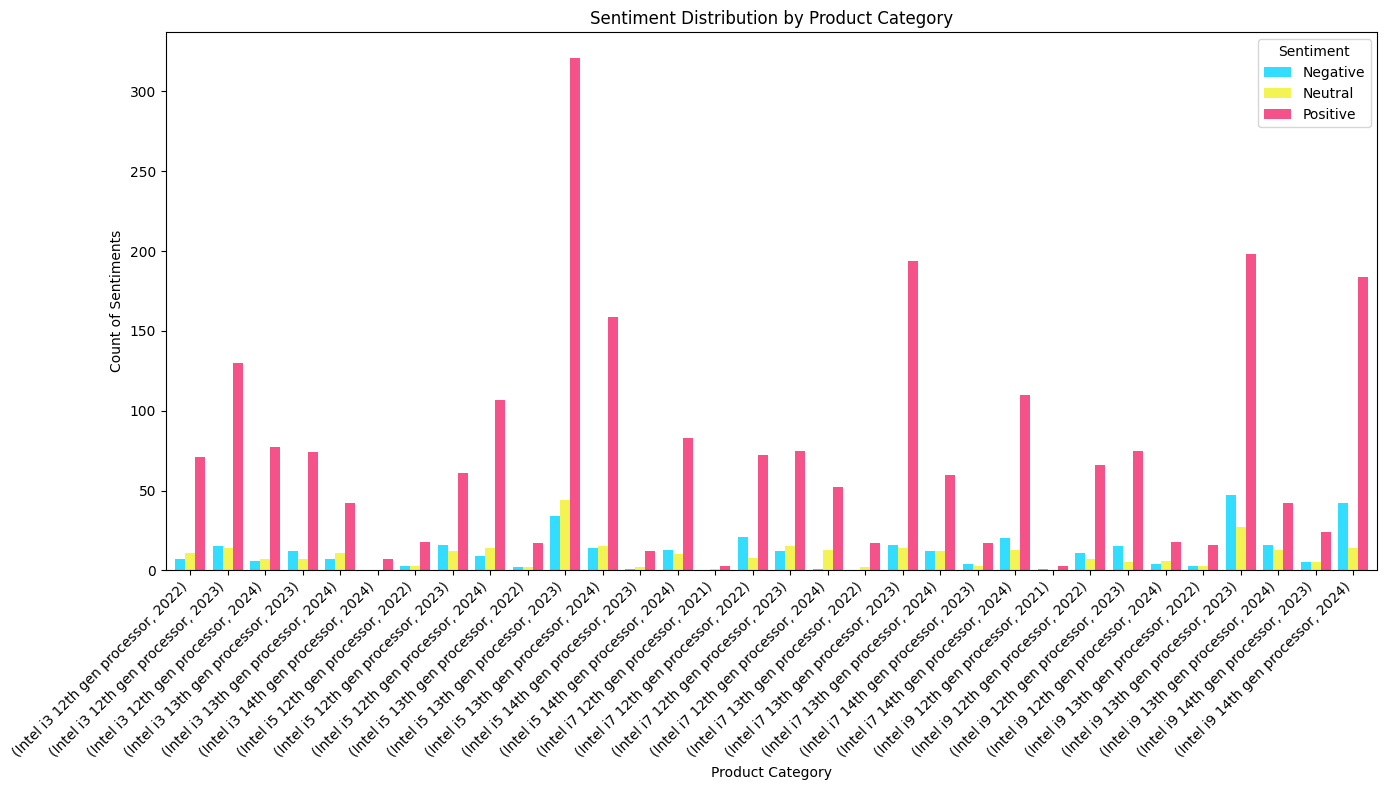

In [23]:
import matplotlib.pyplot as plt

# Assuming sentiment_counts is already created as per the previous steps

# Plotting the bar chart
custom_colors = ['#33DDFF','#F3F353','#F45288','#D06FE1']
sentiment_counts.plot(kind='bar', figsize=(14, 8), width=0.8, color=custom_colors)

# Adding title and labels
plt.title('Sentiment Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', loc='upper right')

# Display the chart
plt.tight_layout()
plt.show()

In [12]:
# Step 1: Extract the year from the review_date column
# df_no_duplicates['year'] = pd.to_datetime(df_no_duplicates['date']).dt.year
# df_no_duplicates.loc[:, 'year'] = pd.to_datetime(df_no_duplicates['date']).dt.year
df_no_duplicates.loc[:, 'year'] = pd.to_datetime(df_no_duplicates['date']).dt.year


# Step 2: Group by category, year, and sentiment, then count the occurrences
sentiment_counts = df_no_duplicates.groupby(['category', 'year', 'sentiment']).size().unstack(fill_value=0)

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(14, 8))
sentiment_counts.plot(kind='bar', stacked=True, ax=ax)

# Adding title and labels
plt.title('Year-wise Sentiment Distribution by Product Category')
plt.xlabel('Product Category and Year')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', loc='upper right')

# Display the chart
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16320\2570012467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates.loc[:, 'year'] = pd.to_datetime(df_no_duplicates['date']).dt.year


NameError: name 'plt' is not defined

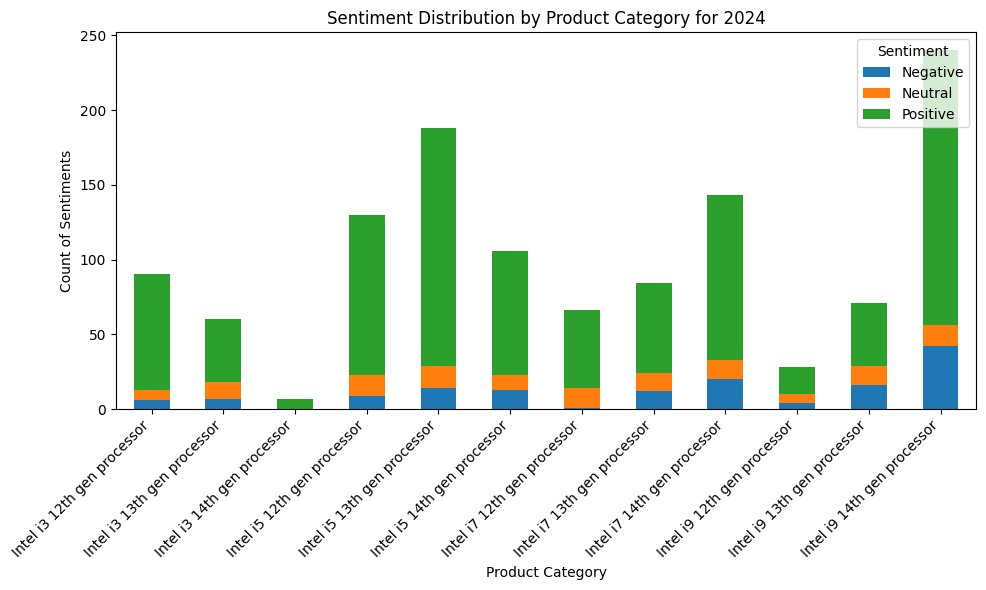

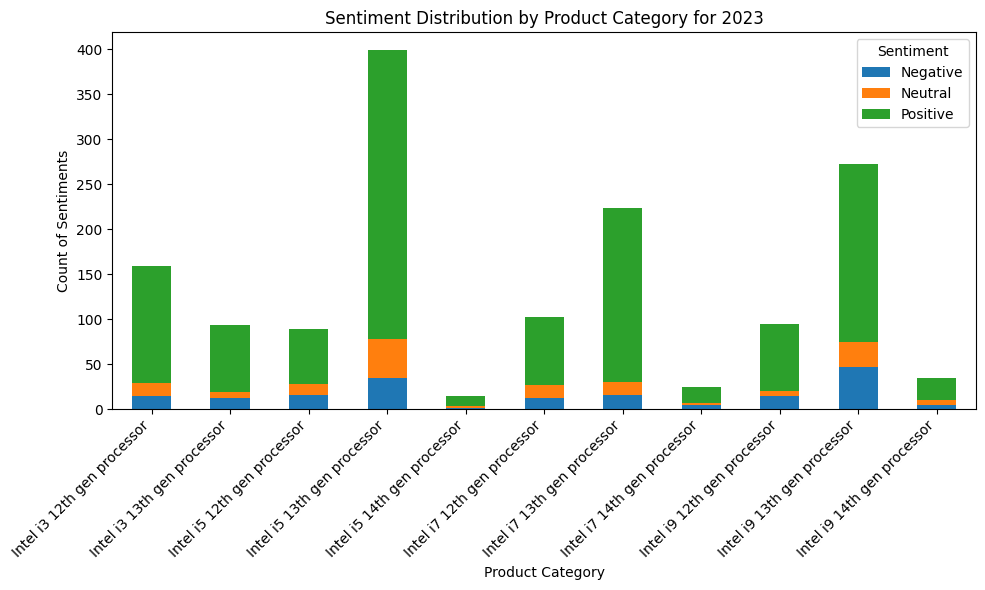

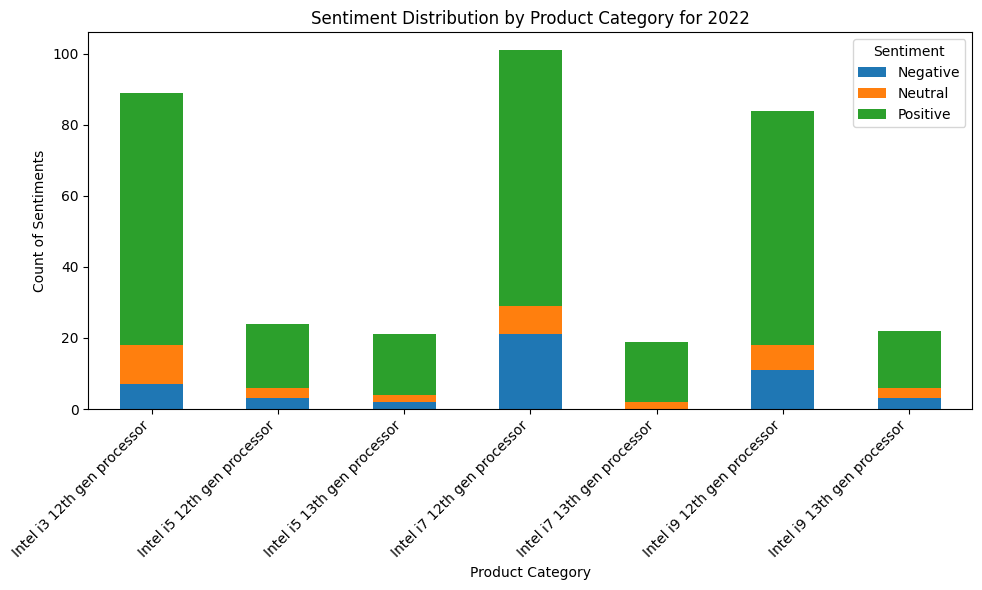

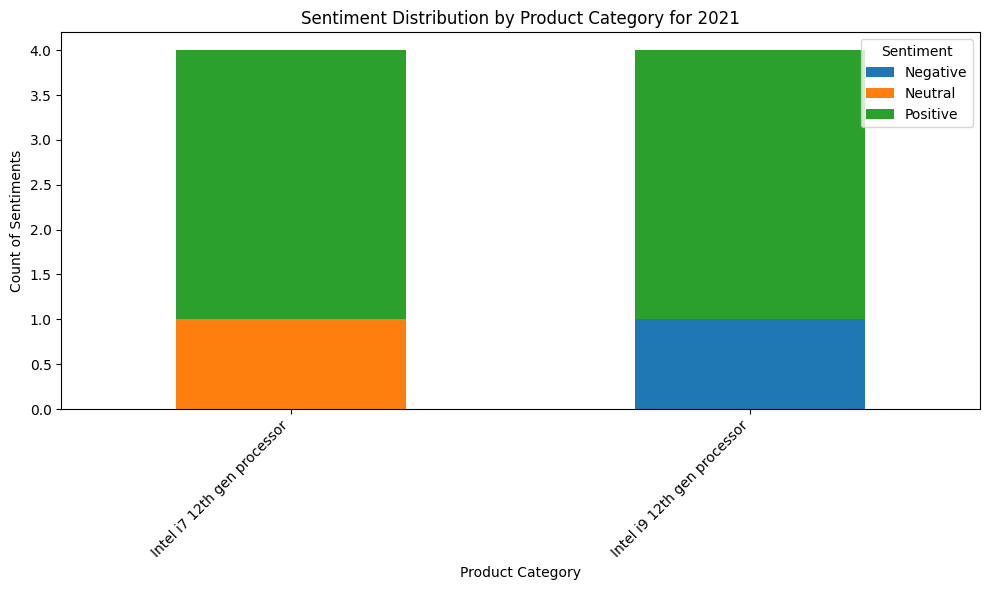

In [25]:
# Get unique years
years = df_no_duplicates['year'].unique()

# Create a separate chart for each year
for year in years:
    # Filter data for the current year
    data_year = df_no_duplicates[df_no_duplicates['year'] == year]
    
    # Group by category and sentiment, then count occurrences
    sentiment_counts_year = data_year.groupby(['category', 'sentiment']).size().unstack(fill_value=0)
    
    # Plot the data
    fig, ax = plt.subplots(figsize=(10, 6))
    sentiment_counts_year.plot(kind='bar', stacked=True, ax=ax)
    
    # Adding title and labels
    plt.title(f'Sentiment Distribution by Product Category for {year}')
    plt.xlabel('Product Category')
    plt.ylabel('Count of Sentiments')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Sentiment', loc='upper right')
    
    # Display the chart
    plt.tight_layout()
    plt.show()

In [74]:
# Line Chart
# Plotting a line chart
# fig, ax = plt.subplots(figsize=(14, 8))

# for sentiment in ['Negative', 'Neutral', 'Positive']:
#     sentiment_counts[sentiment].unstack(level=0).plot(kind='line', ax=ax, marker='o', linewidth=2)

# # Adding title and labels
# plt.title('Year-wise Sentiment Trend by Product Category')
# plt.xlabel('Year')
# plt.ylabel('Count of Sentiments')
# plt.legend(title='Sentiment and Category', loc='upper left')
# plt.xticks(rotation=45)

# # Display the chart
# plt.tight_layout()
# plt.show()


In [75]:
# Area Chart
# Plotting an area chart
# fig, ax = plt.subplots(figsize=(14, 8))

# sentiment_counts.unstack(level=0).plot(kind='area', ax=ax, stacked=True, alpha=0.5)

# # Adding title and labels
# plt.title('Year-wise Sentiment Distribution by Product Category')
# plt.xlabel('Year')
# plt.ylabel('Count of Sentiments')
# plt.legend(title='Category', loc='upper left')
# plt.xticks(rotation=45)

# # Display the chart
# plt.tight_layout()
# plt.show()


In [16]:
# Define positive and negative sentiment thresholds
positive_threshold = 0
negative_threshold = 0

# Count positive and negative reviews
positive_reviews = df_no_duplicates[df_no_duplicates['sentiment'] == 'Positive'].shape[0]
negative_reviews = df_no_duplicates[df_no_duplicates['sentiment'] == 'Negative'].shape[0]

# Calculate total reviews
total_reviews = df_no_duplicates.shape[0]

# Calculate customer satisfaction percentage
customer_satisfaction_percentage = (positive_reviews / total_reviews) * 100
negative_reviews_percentage = (negative_reviews / total_reviews) * 100

print(f"Customer Satisfaction Percentage: {customer_satisfaction_percentage:.2f}%")
print(f"Negative Reviews Percentage: {negative_reviews_percentage:.2f}%")

Customer Satisfaction Percentage: 77.91%
Negative Reviews Percentage: 11.95%


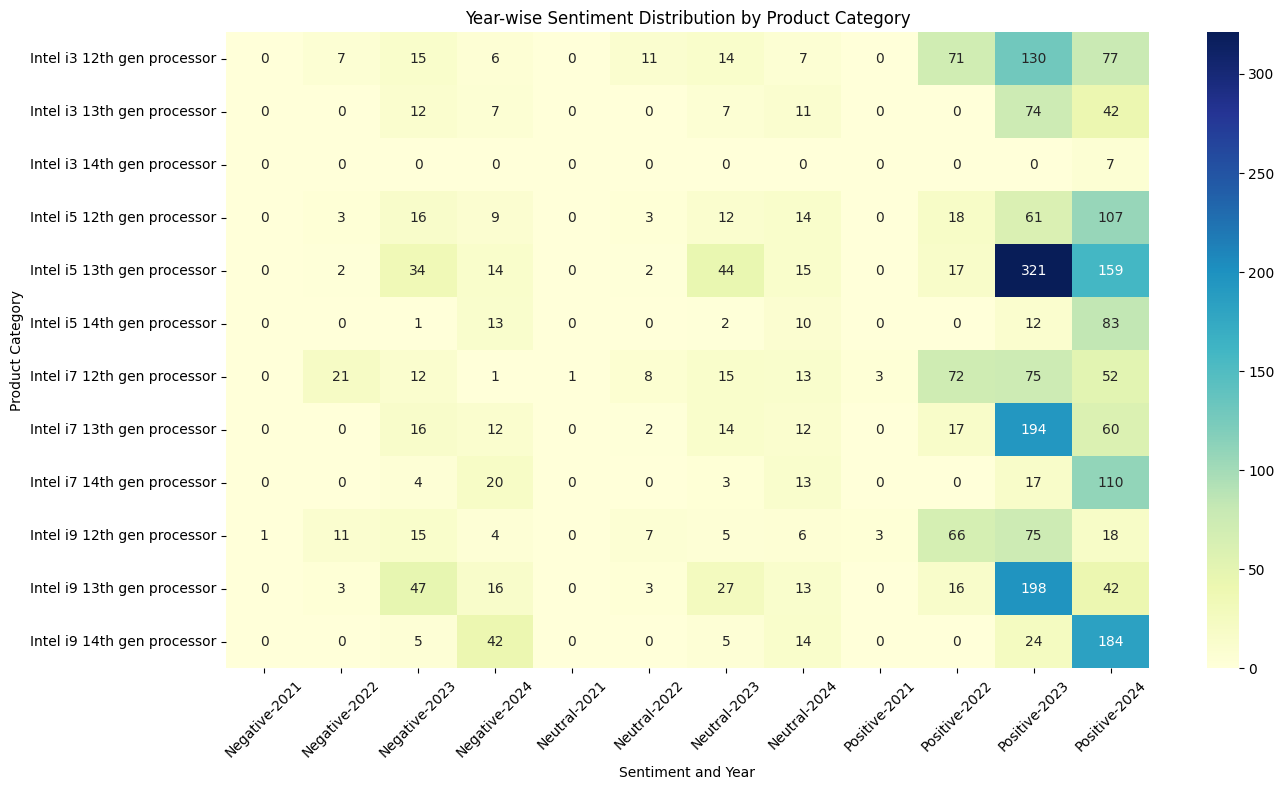

In [26]:
# Heatmap
import seaborn as sns

# Reshape the data for heatmap
heatmap_data = sentiment_counts.unstack().fillna(0)

# Plotting a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

# Adding title and labels
plt.title('Year-wise Sentiment Distribution by Product Category')
plt.xlabel('Sentiment and Year')
plt.ylabel('Product Category')
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


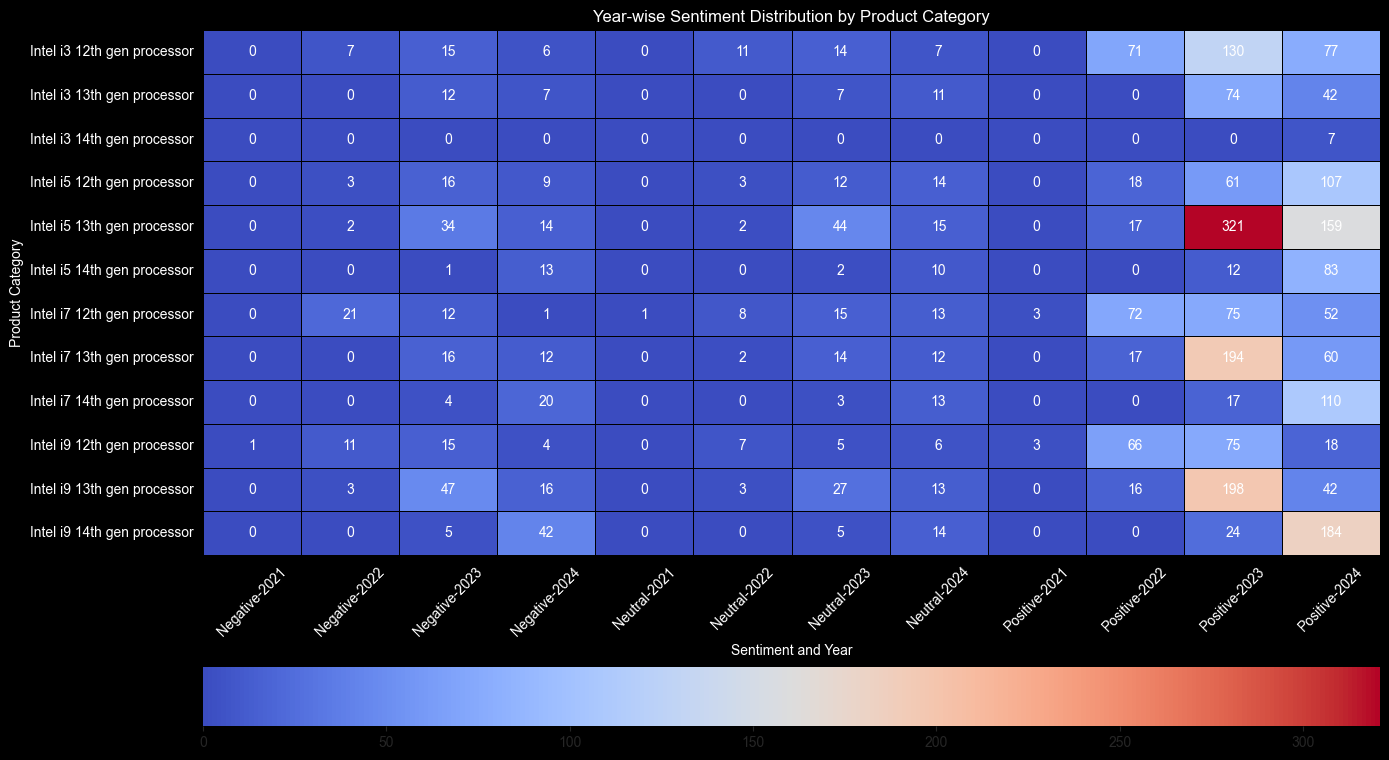

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to dark
sns.set_style("darkgrid", {"axes.facecolor": "black", "figure.facecolor": "black"})

# Reshape the data for heatmap
heatmap_data = sentiment_counts.unstack().fillna(0)

# Plotting a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='g', cbar_kws={'orientation': 'horizontal'},
            annot_kws={'color': 'white'}, linewidths=.5, linecolor='black')

# Adding title and labels
plt.title('Year-wise Sentiment Distribution by Product Category', color='white')
plt.xlabel('Sentiment and Year', color='white')
plt.ylabel('Product Category', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Adjust layout to fit all elements
plt.tight_layout()

# Save the plot as an image file
plt.savefig('heatmap_black_background.png', dpi=300, bbox_inches='tight', facecolor='black')

# Display the chart
plt.show()


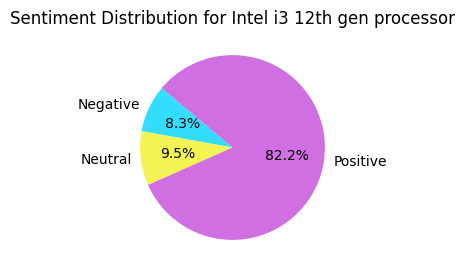

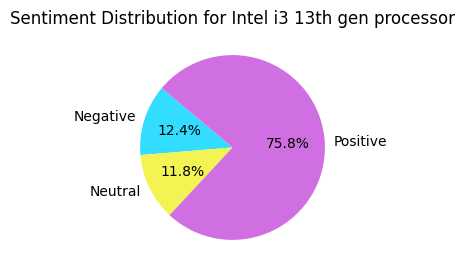

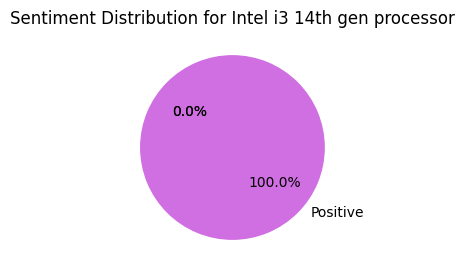

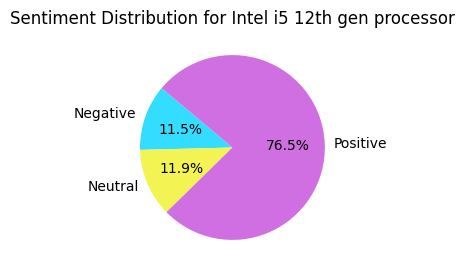

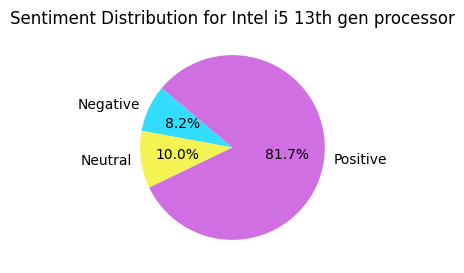

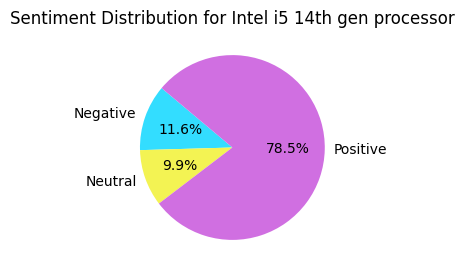

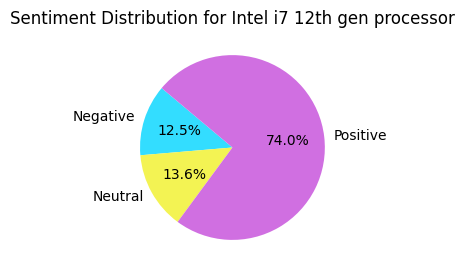

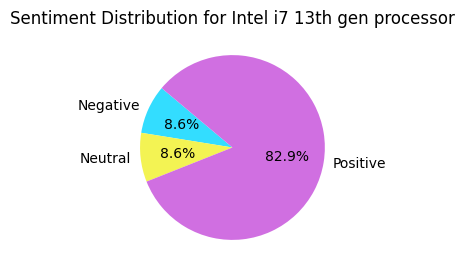

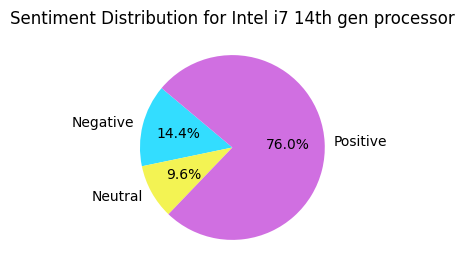

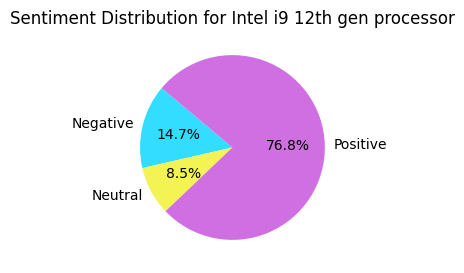

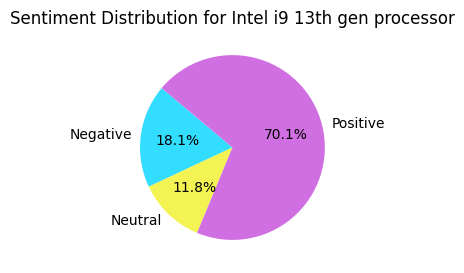

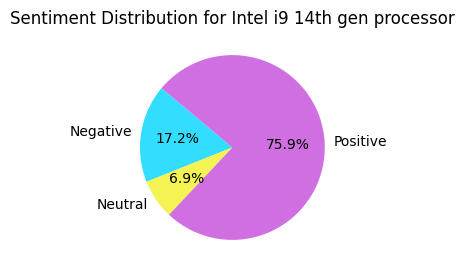

In [33]:
# Pie Chart
import matplotlib.pyplot as plt

# Group by 'category' and 'sentiment', then count the occurrences of each sentiment category
sentiment_counts = df_no_duplicates.groupby(['category', 'sentiment'])['sentiment'].count()

# Unstack the grouped DataFrame to pivot 'sentiment' into columns
sentiment_counts = sentiment_counts.unstack(level=-1, fill_value=0)
custom_colors = ['#33DDFF','#F3F353','#F45288','#D06FE1']
# Generate pie charts for each category
for category in sentiment_counts.index:
    plt.figure(figsize=(3, 3))
    sentiment_counts.loc[category].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#33DDFF','#F3F353','#D06FE1'])
    plt.title(f'Sentiment Distribution for {category}')
    plt.ylabel('')  # Hide y-label for better appearance
    plt.show()


In [1]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df_no_duplicates has the 'country', 'category', and 'sentiment' columns

# # Group by 'country', 'category', and 'sentiment', then count the occurrences of each sentiment category
# grouped_counts = df_no_duplicates.groupby(['country', 'category', 'sentiment']).size().reset_index(name='counts')

# # Pivot the DataFrame for easier plotting
# pivot_df = grouped_counts.pivot_table(index=['country', 'category'], columns='sentiment', values='counts', fill_value=0)

# # Reset the index for easier plotting
# pivot_df = pivot_df.reset_index()

# # Plot the grouped bar chart using seaborn
# plt.figure(figsize=(14, 8))
# sns.set(style="whitegrid")

# # Melt the DataFrame to long format for seaborn
# melted_df = pivot_df.melt(id_vars=['country', 'category'], value_vars=['Negative', 'Neutral', 'Positive'],
#                           var_name='Sentiment', value_name='Counts')

# # Create the grouped bar chart
# g = sns.catplot(data=melted_df, kind='bar', x='country', y='Counts', hue='Sentiment', col='category', col_wrap=3, height=4, aspect=1.5)
# g.set_xticklabels(rotation=90)

# # Adjust the layout
# plt.subplots_adjust(top=0.9)
# g.fig.suptitle('Country and Category Wise Sentiment Distribution')

# # Show the plot
# plt.show()


In [34]:
df_no_duplicates['country'].unique()

array(['India', 'Canada', 'France', 'Australia', 'Italy', 'Germany',
       'the United Kingdom', 'the United States', 'Spain', 'Belgium',
       'Brazil', 'the Netherlands', 'Singapore', 'Mexico', 'Japan',
       'Poland', 'Sweden'], dtype=object)

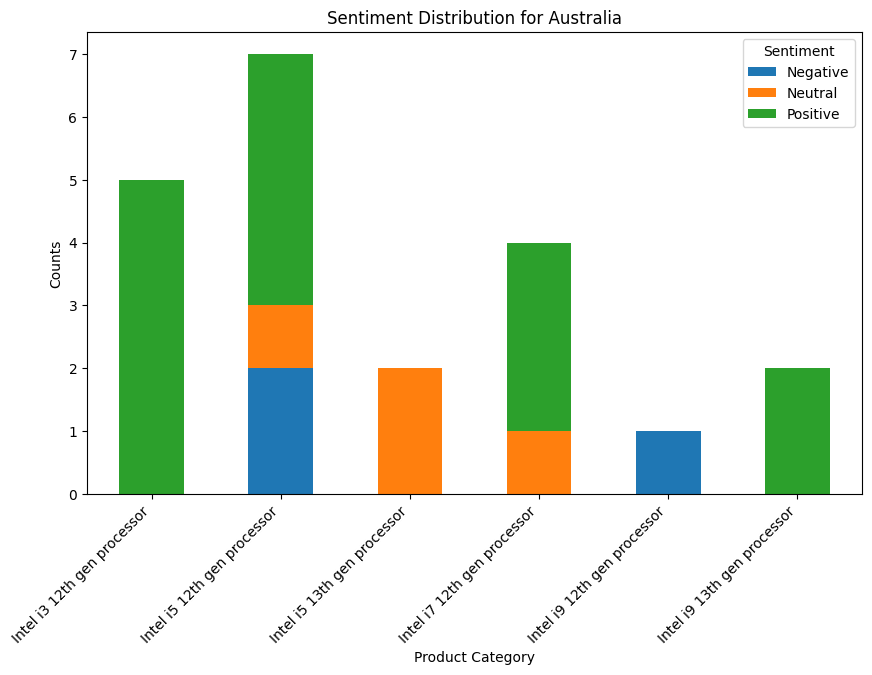

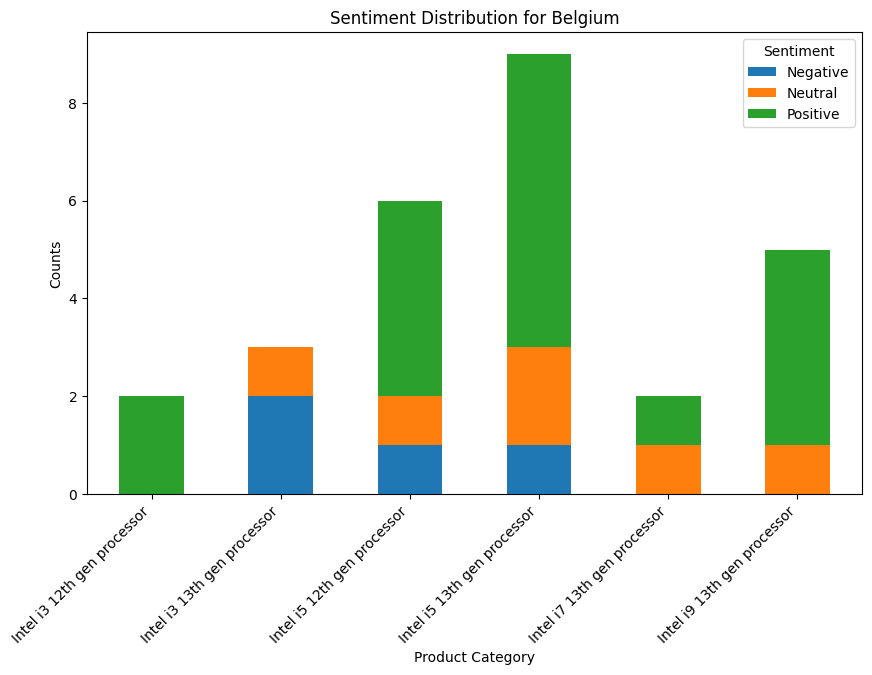

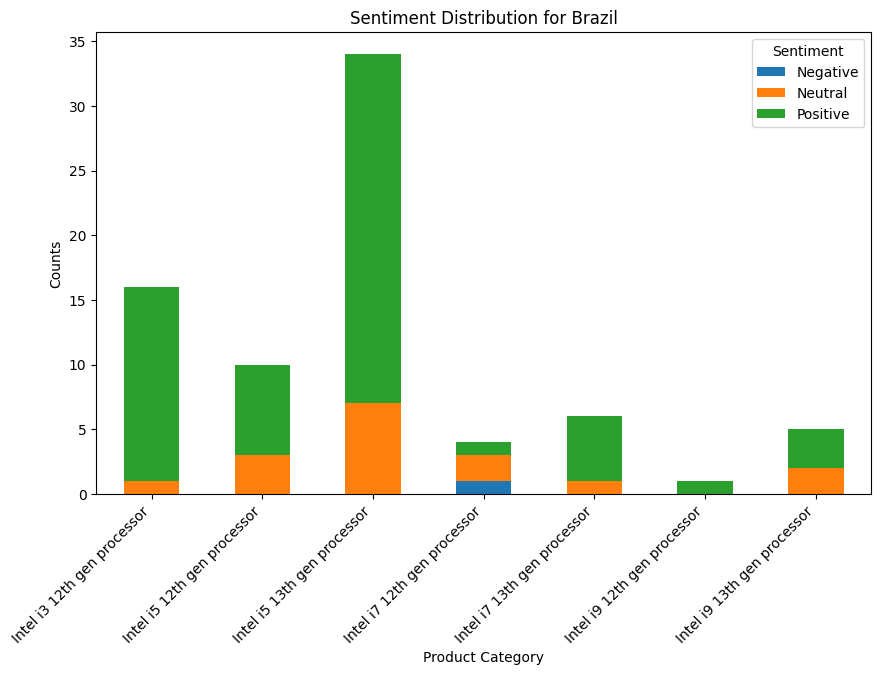

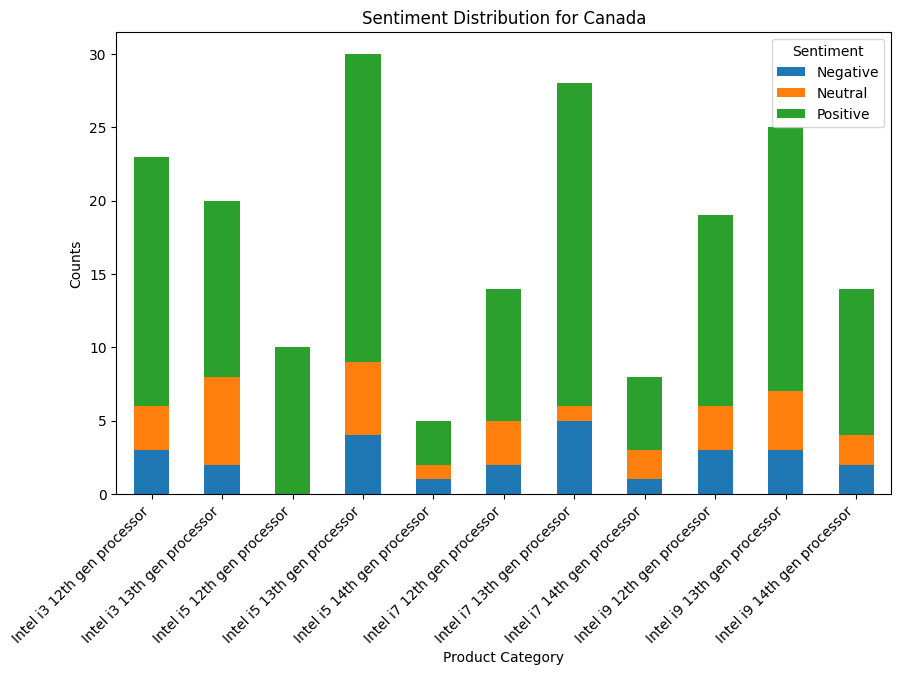

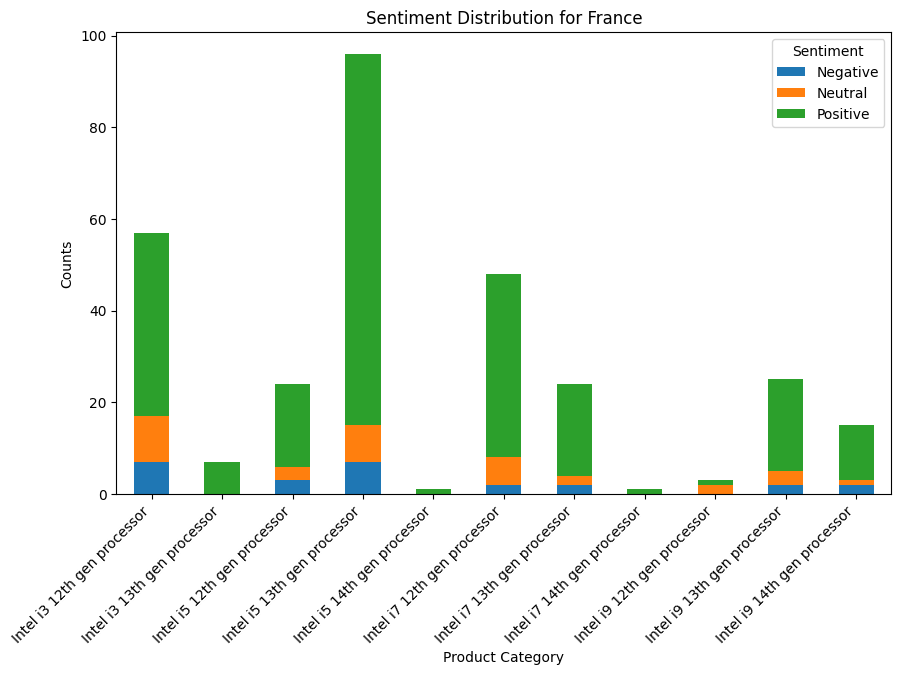

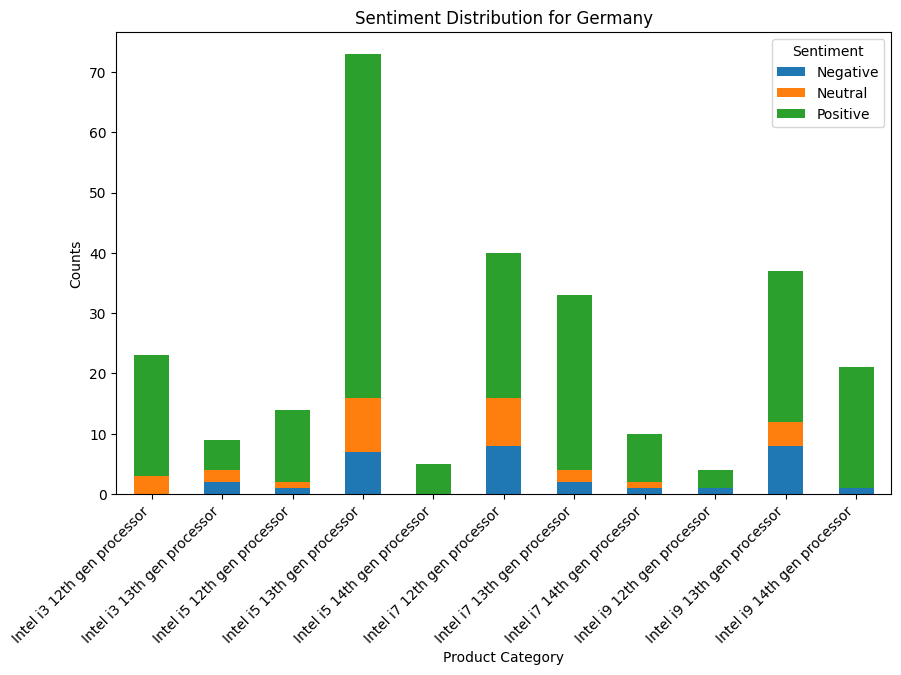

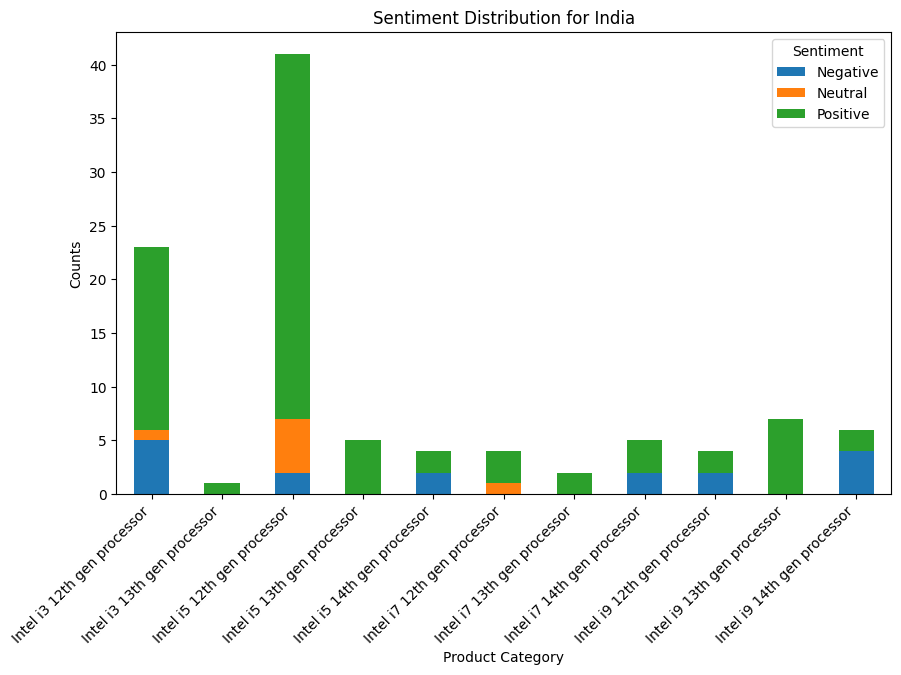

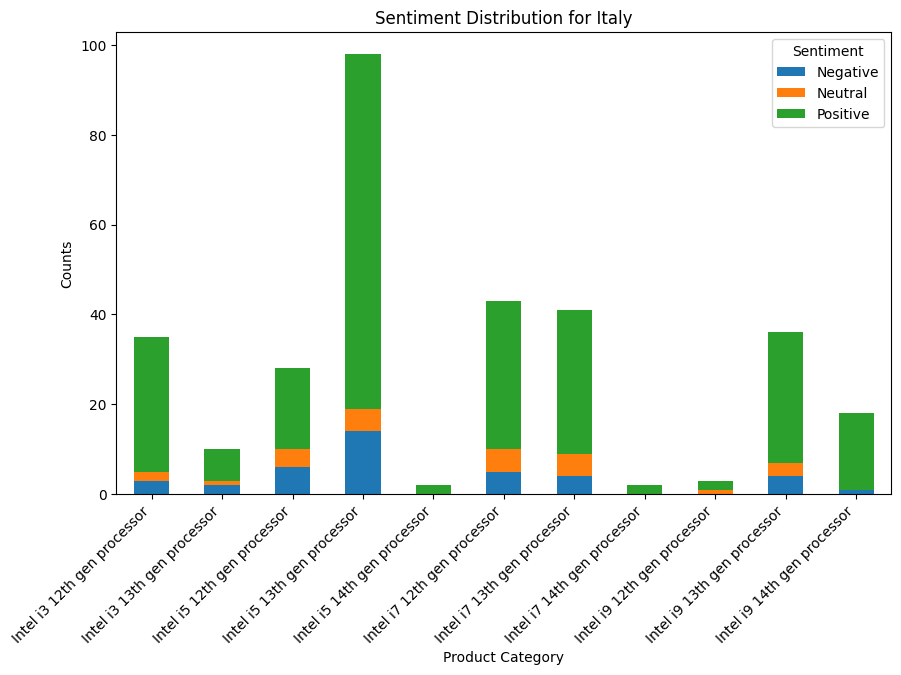

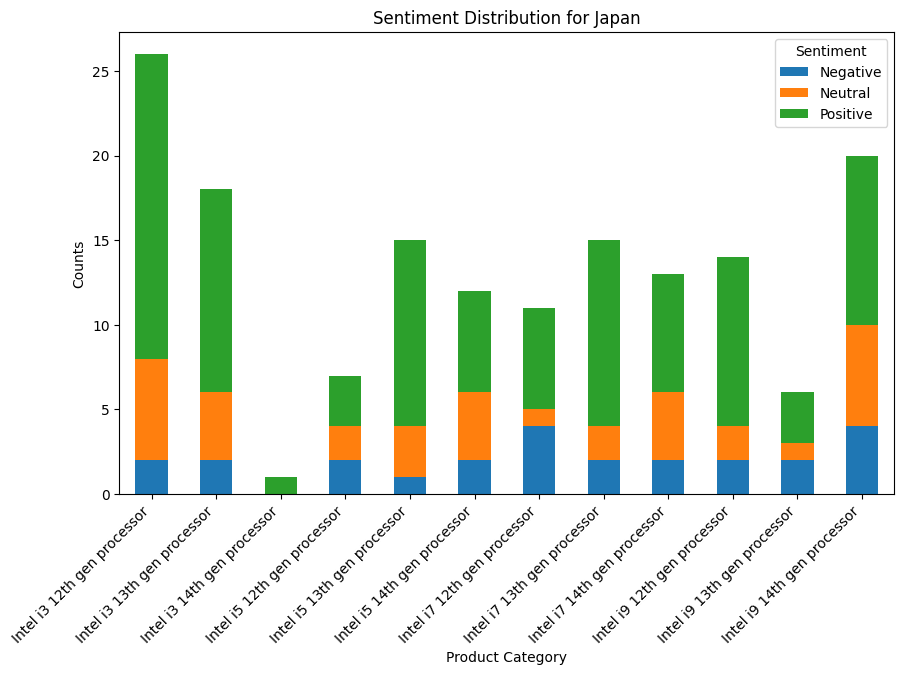

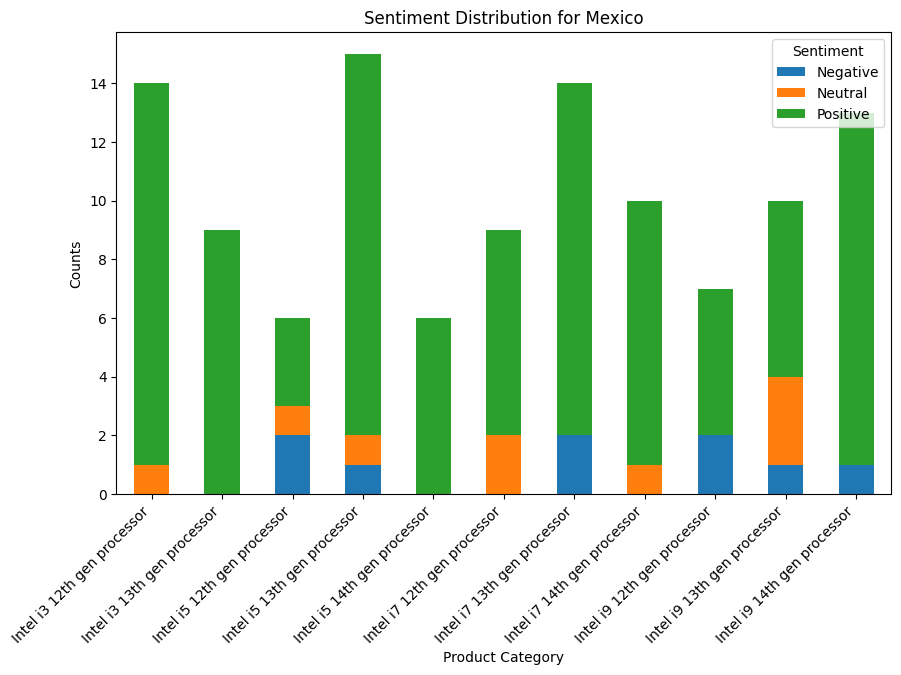

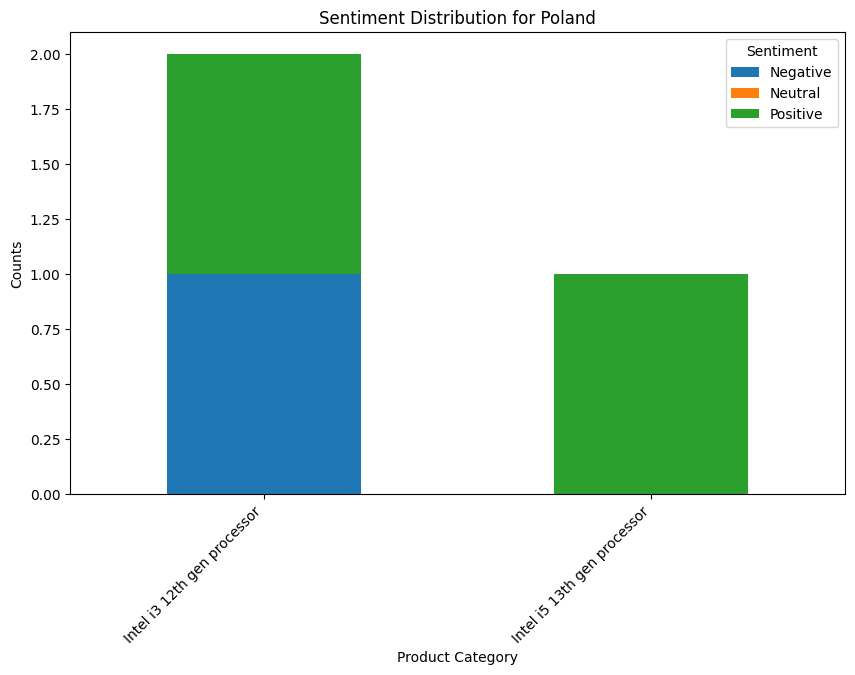

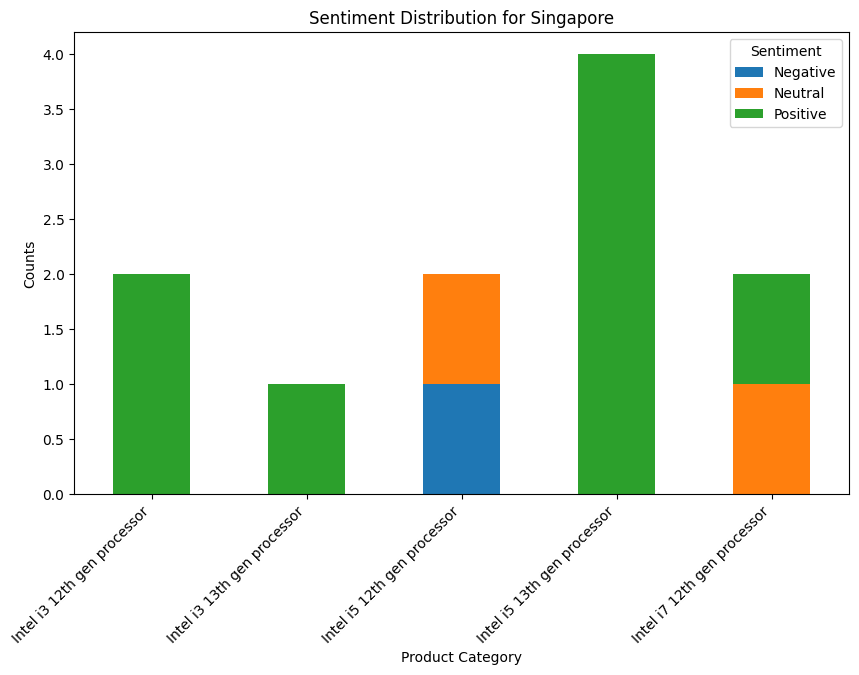

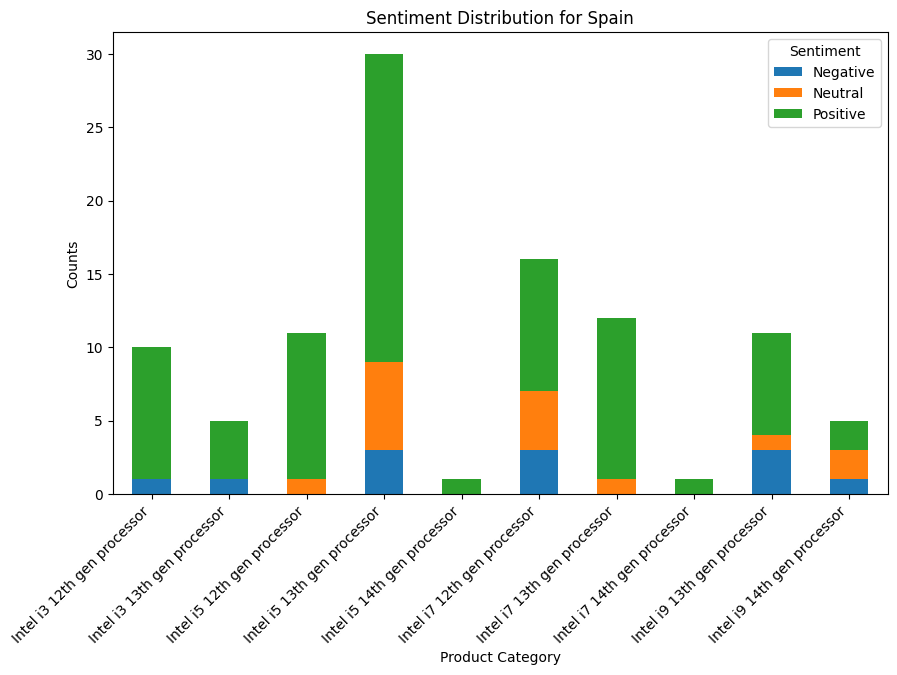

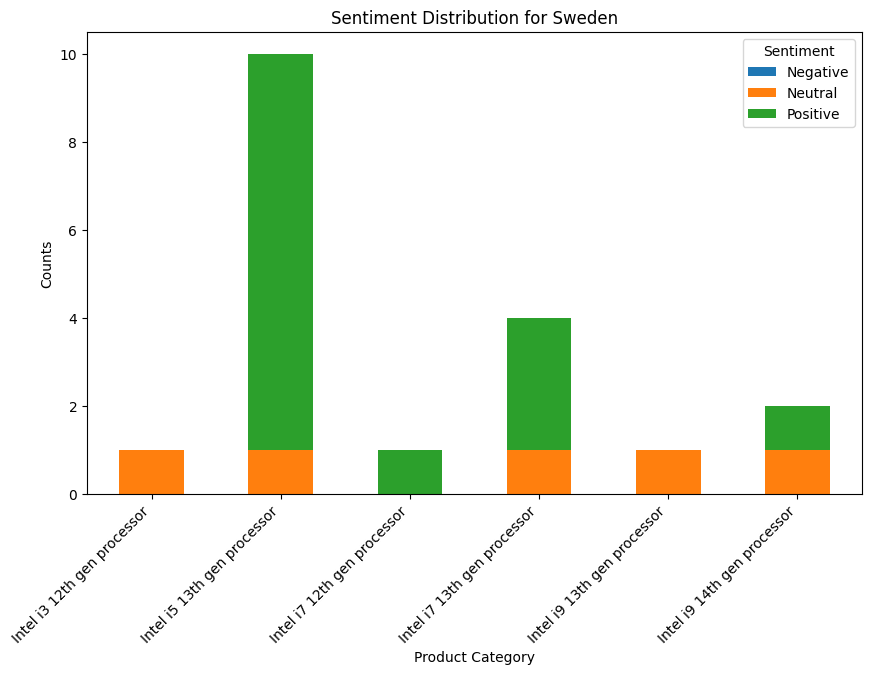

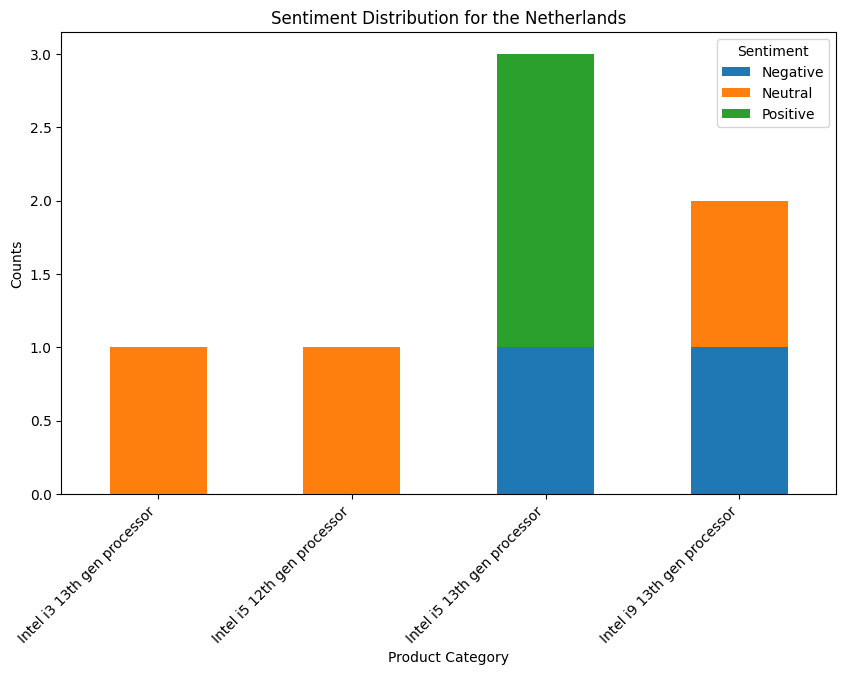

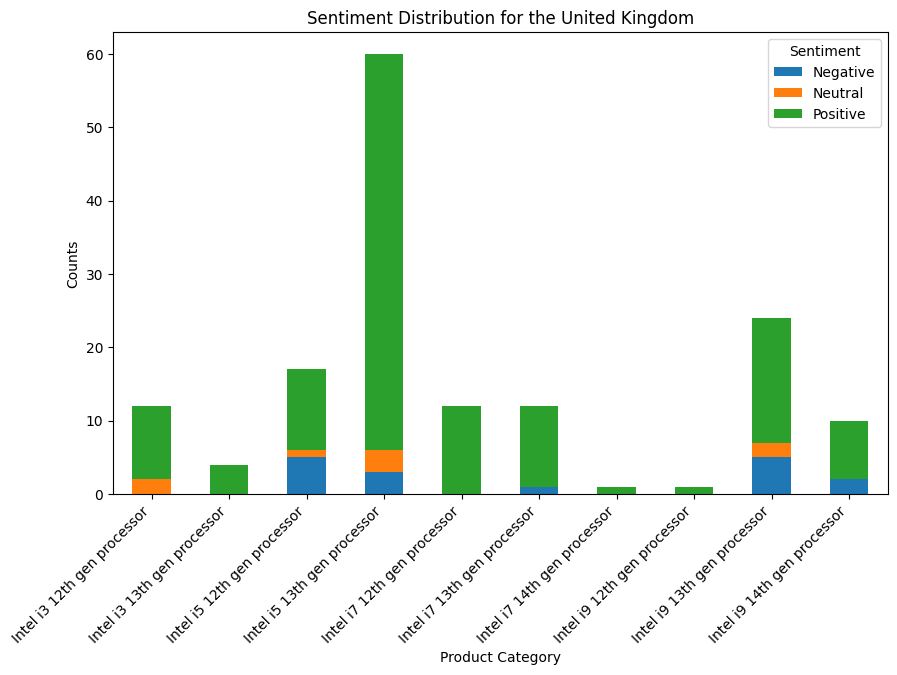

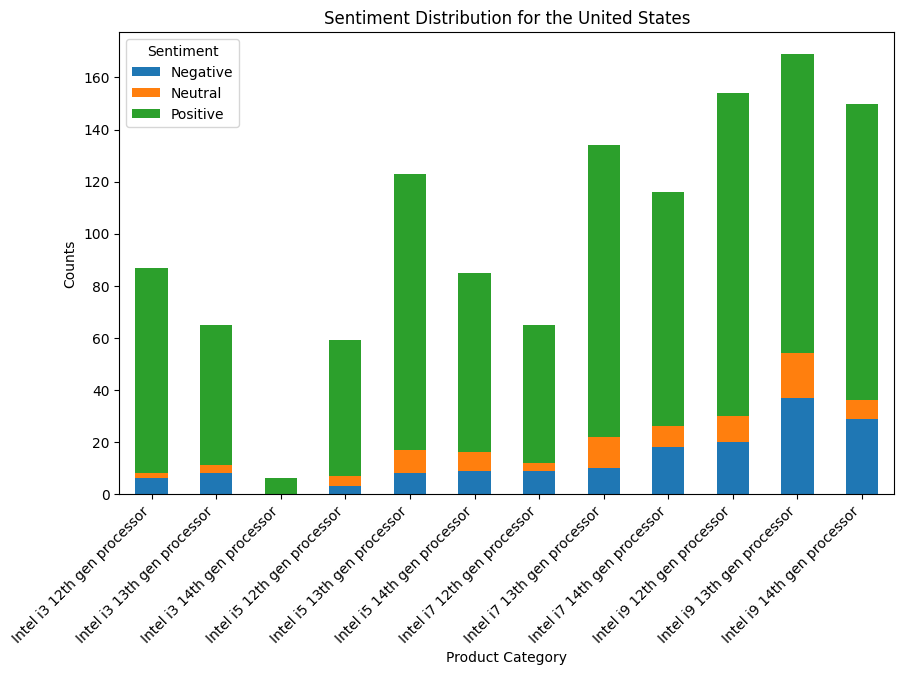

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_no_duplicates has the 'country', 'category', and 'sentiment' columns

# Group by 'country', 'category', and 'sentiment', then count the occurrences of each sentiment category
grouped_counts = df_no_duplicates.groupby(['country', 'category', 'sentiment']).size().reset_index(name='counts')

# Pivot the DataFrame for easier plotting
pivot_df = grouped_counts.pivot_table(index=['country', 'category'], columns='sentiment', values='counts', fill_value=0)

# Reset the index for easier plotting
pivot_df = pivot_df.reset_index()

# Plot the stacked bar chart using matplotlib
countries = pivot_df['country'].unique()
sentiments = ['Negative', 'Neutral', 'Positive']

for country in countries:
    country_data = pivot_df[pivot_df['country'] == country].set_index('category')
    
    # Plot the data for the current country
    ax = country_data[sentiments].plot(kind='bar', stacked=True, figsize=(10, 6), title=f'Sentiment Distribution for {country}')
    ax.set_ylabel('Counts')
    ax.set_xlabel('Product Category')
    plt.xticks(rotation=45, ha='right')
    
    # Add legend
    plt.legend(title='Sentiment')
    
    # Show the plot
    plt.show()


In [28]:
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to extract aspects from review text
def extract_aspects(review_text):
    doc = nlp(review_text)
    aspects = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN'] or token.dep_ in ['amod', 'compound']]
    return aspects

# Function to classify sentiment of an aspect
def classify_sentiment(aspect):
    score = analyzer.polarity_scores(aspect)
    sentiment_score = score['compound']
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def process_reviews(df):
    df = df.copy()  # Make a copy of the DataFrame to avoid modifying the original DataFrame
    df.loc[:, 'aspect'] = df['review_text'].apply(extract_aspects)
    df.loc[:, 'aspect_sentiment'] = df['aspect'].apply(lambda aspects: [classify_sentiment(aspect) for aspect in aspects])
    return df

df_aspects = process_reviews(df_no_duplicates)

print(df_aspects)

      customer_name  rating  \
0              ARUN     5.0   
1             Ayush     5.0   
2            Hruaia     5.0   
3           Yavvari     4.0   
4           Mr.GeAr     5.0   
...             ...     ...   
3364     Leroy Dodd     5.0   
3365       cathyesq     5.0   
3366         Jon281     5.0   
3367  Jorge Mendoza     5.0   
3368         Hau Le     5.0   

                                            review_text  \
0     the processor was very power efficient i devel...   
1     try to get it under k and check the rankings i...   
2     i upgrade from f the performance gain is a hug...   
3     this will not work without graphic card so be ...   
4     best gaming and multitasking processor at the ...   
...                                                 ...   
3364  the processor can in fine i thought i was bein...   
3365  my son recently upgraded his computer and we b...   
3366  a friend told me he was running tekken on a th...   
3367  worked perfectly for fortnite a

In [29]:
# Step 1: Count the frequency of each aspect
aspect_counts = df_aspects['aspect'].explode().value_counts()

# Step 2: Define a function to get the most frequent aspect for each row
def get_most_frequent_aspect(row):
    aspects = row['aspect']
    if aspects:
        return max(aspects, key=lambda aspect: aspect_counts.get(aspect, 0))
    else:
        return None

# Step 3: Apply the function to create the 'keyfeature' column
df_aspects.loc[:, 'keyfeature'] = df_aspects.apply(get_most_frequent_aspect, axis=1)

# Display the DataFrame with the new column
print(df_aspects)

      customer_name  rating  \
0              ARUN     5.0   
1             Ayush     5.0   
2            Hruaia     5.0   
3           Yavvari     4.0   
4           Mr.GeAr     5.0   
...             ...     ...   
3364     Leroy Dodd     5.0   
3365       cathyesq     5.0   
3366         Jon281     5.0   
3367  Jorge Mendoza     5.0   
3368         Hau Le     5.0   

                                            review_text  \
0     the processor was very power efficient i devel...   
1     try to get it under k and check the rankings i...   
2     i upgrade from f the performance gain is a hug...   
3     this will not work without graphic card so be ...   
4     best gaming and multitasking processor at the ...   
...                                                 ...   
3364  the processor can in fine i thought i was bein...   
3365  my son recently upgraded his computer and we b...   
3366  a friend told me he was running tekken on a th...   
3367  worked perfectly for fortnite a

In [30]:
# Filter the DataFrame to select rows where sentiment is negative and select the 'keyfeature' column
negative_keyfeatures = df_aspects[df_aspects['sentiment'] == 'Negative']['keyfeature']

# Display the resulting data
print('Improvement required for below features : ')
print(negative_keyfeatures)
# print(type(negative_keyfeatures))

keyfeature_counts = negative_keyfeatures.value_counts()

# Display the resulting frequencies
print('Frequency of key features for negative sentiment:')
# print(keyfeature_counts)

filtered_keyfeature_counts = keyfeature_counts[keyfeature_counts > 10]

# Display the resulting filtered frequencies
print('\n\nKey features with frequency greater than 10 for negative sentiment:')
print(filtered_keyfeature_counts)

Improvement required for below features : 
28        processor
33          product
49      performance
55              cpu
62            intel
           ...     
3319      processor
3329      processor
3342           core
3350      excellent
3361      processor
Name: keyfeature, Length: 369, dtype: object
Frequency of key features for negative sentiment:


Key features with frequency greater than 10 for negative sentiment:
keyfeature
cpu            119
processor       71
performance     27
k               23
Name: count, dtype: int64


In [31]:
# Filter the DataFrame to select rows where sentiment is negative and select the 'keyfeature' column
positive_keyfeatures = df_aspects[df_aspects['sentiment'] == 'Positive']['keyfeature']

# Display the resulting data
print('Improvement required for below features : ')
print(positive_keyfeatures)

keyfeature_counts = positive_keyfeatures.value_counts()

# Display the resulting frequencies
print('Frequency of key features for positive sentiment:')
# print(keyfeature_counts)

filtered_keyfeature_counts = keyfeature_counts[keyfeature_counts > 10]

# Display the resulting filtered frequencies
print('\n\nKey features with frequency greater than 10 for negative sentiment:')
print(filtered_keyfeature_counts)

Improvement required for below features : 
0       processor
2             cpu
3            card
4       processor
5             cpu
          ...    
3364    processor
3365         good
3366         good
3367          fan
3368          cpu
Name: keyfeature, Length: 2405, dtype: object
Frequency of key features for positive sentiment:


Key features with frequency greater than 10 for negative sentiment:
keyfeature
cpu            693
processor      530
performance    171
good           117
k               79
intel           65
gaming          62
price           59
product         36
games           31
cooler          29
i               25
time            20
pc              18
great           18
excellent       13
power           11
new             11
Name: count, dtype: int64


In [47]:
df_aspects.to_csv('cleaned_reviews.csv', index=False)

In [ ]:
def save_to_csv(reviews, filename='reviews.csv'):
    df = pd.DataFrame(reviews)
    if os.path.isfile(filename):
        df.to_csv(filename, mode='a', header=False, index=False)
    else:
        df.to_csv(filename, index=False)

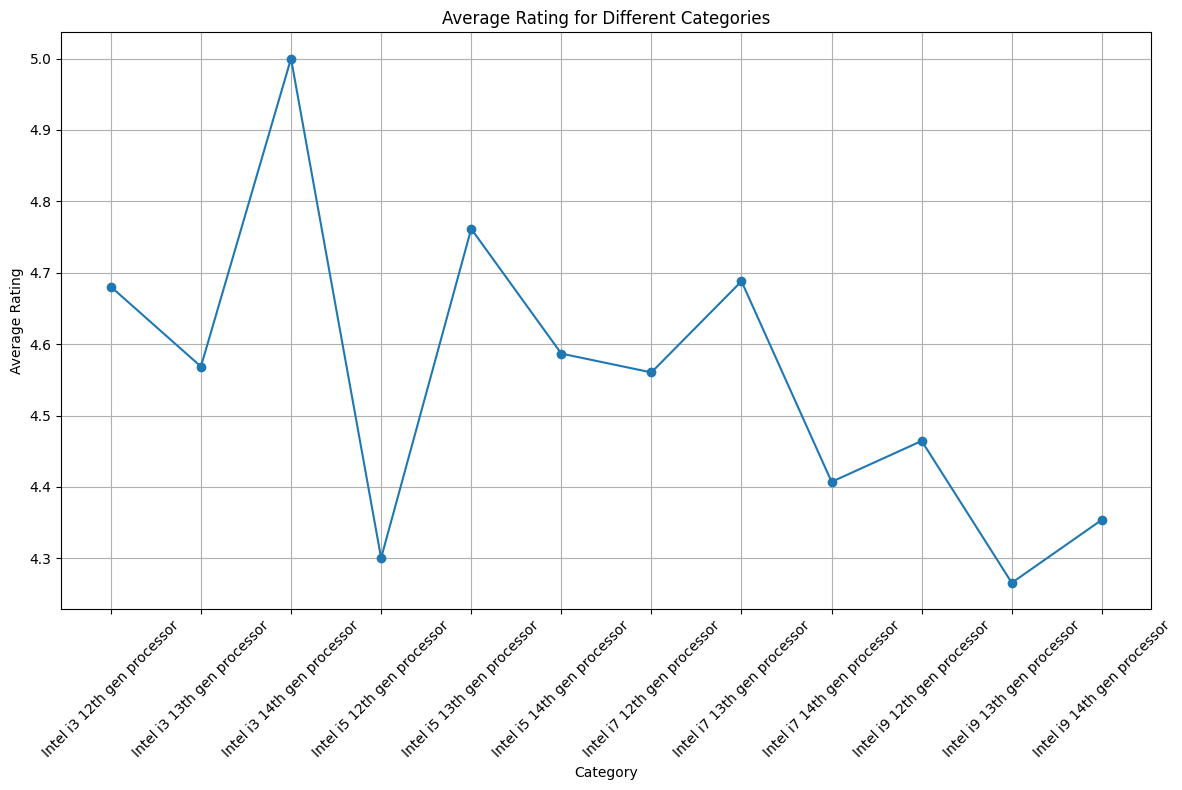

In [39]:
import matplotlib.pyplot as plt

# Calculate average rating for each category
average_ratings = df_aspects.groupby('category')['rating'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(average_ratings['category'], average_ratings['rating'], marker='o', linestyle='-')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating for Different Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Show grid
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

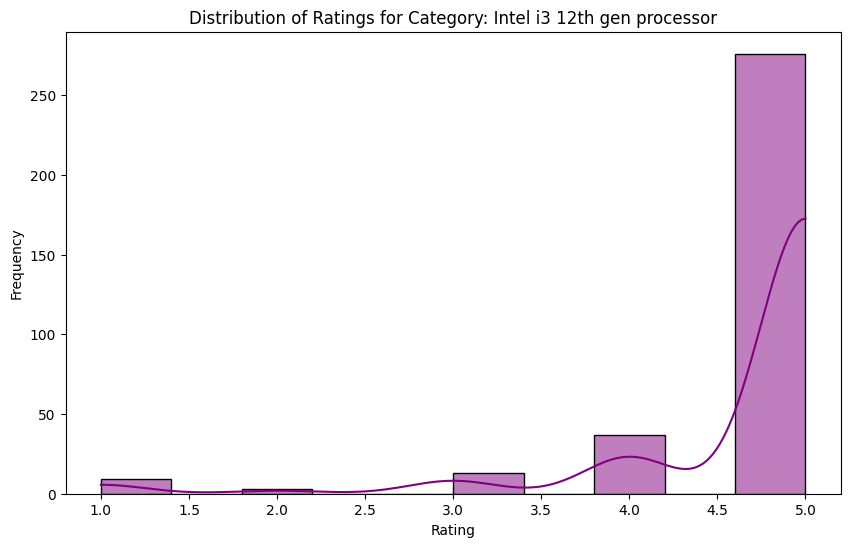

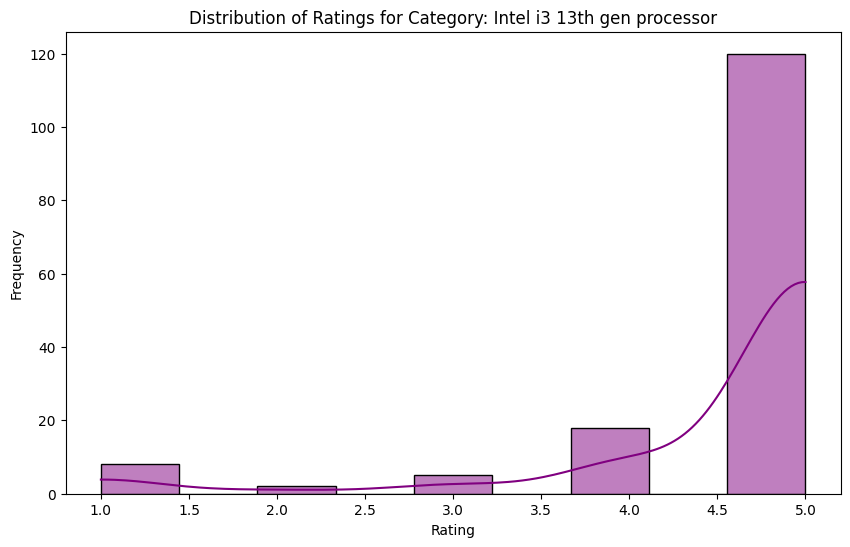

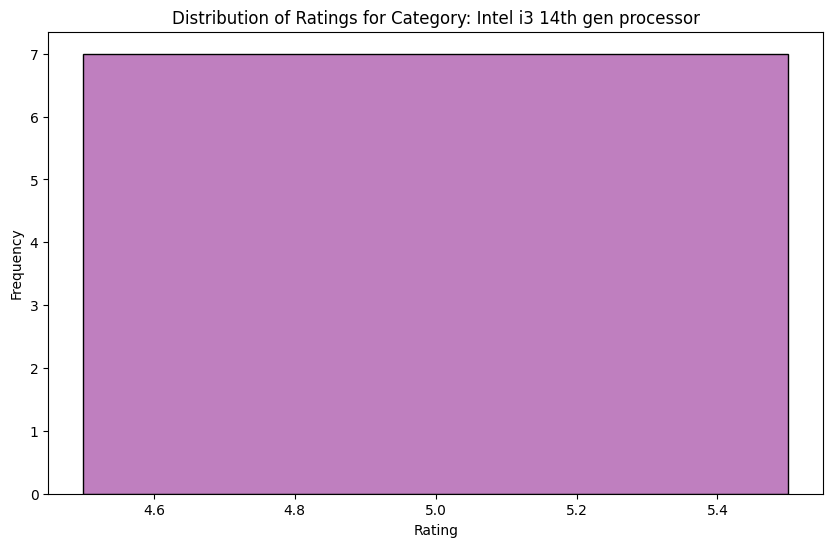

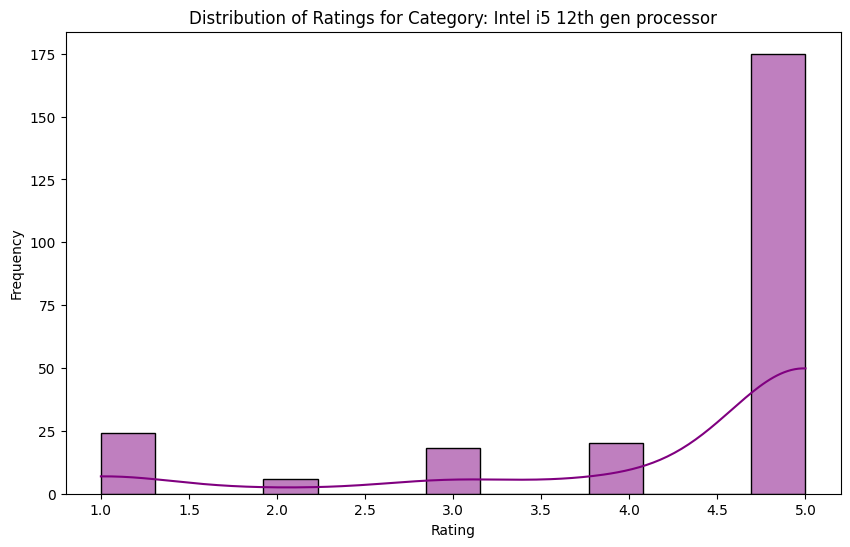

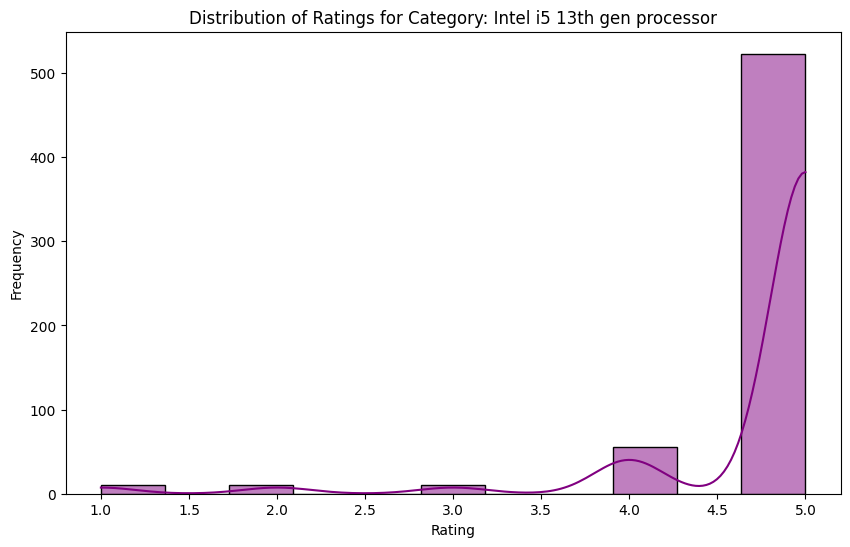

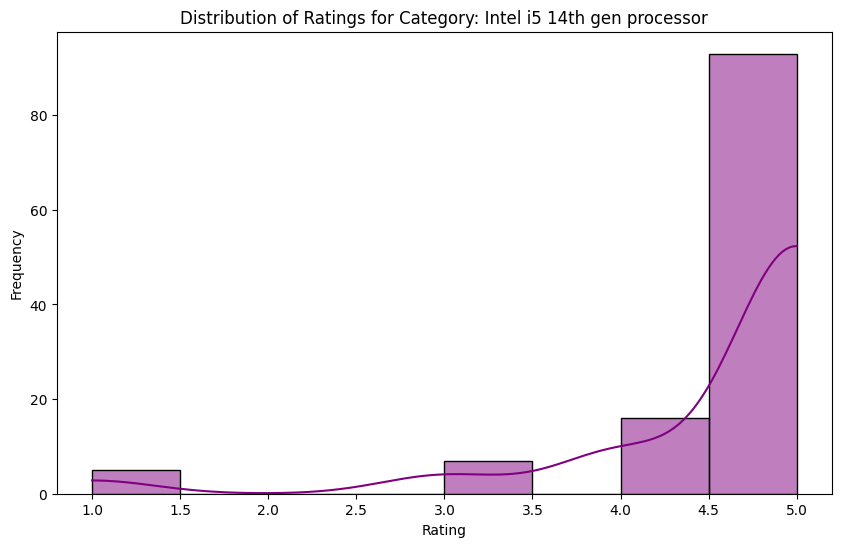

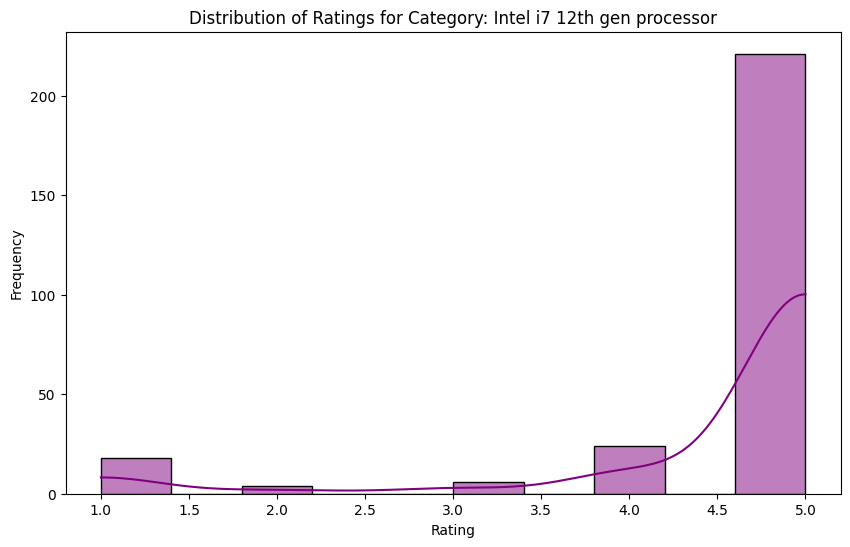

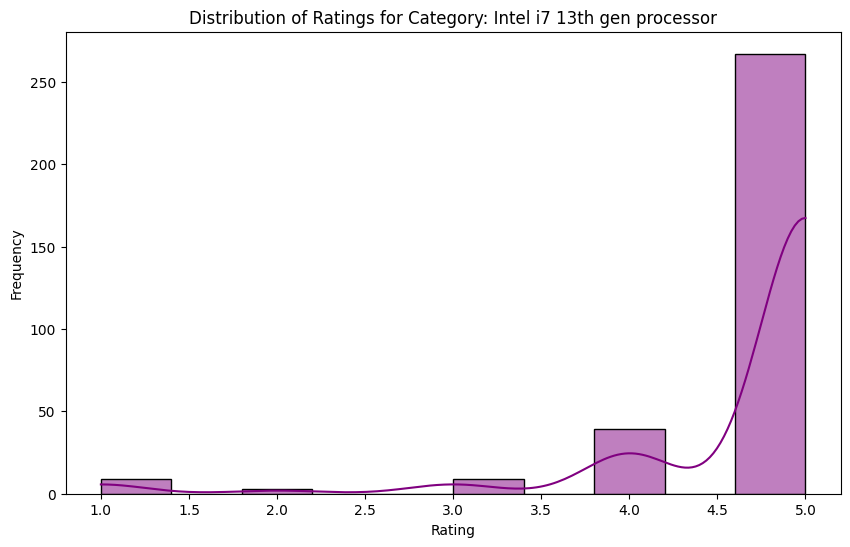

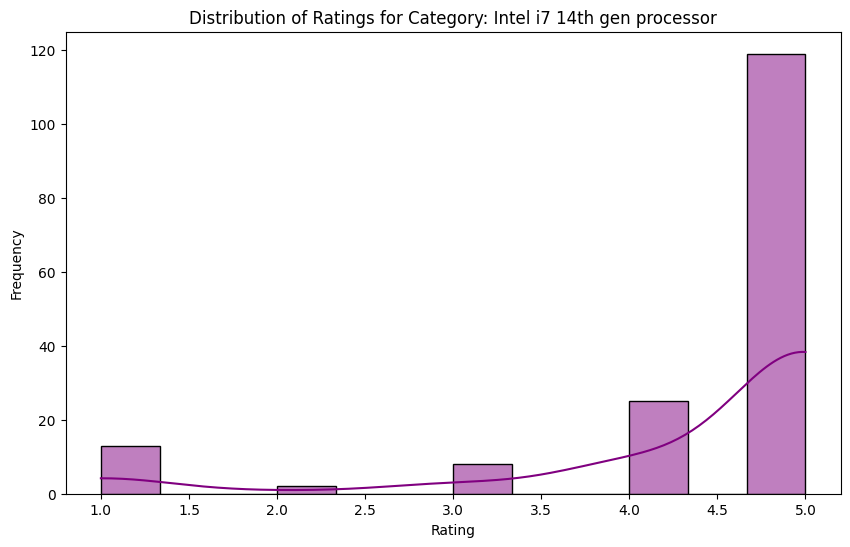

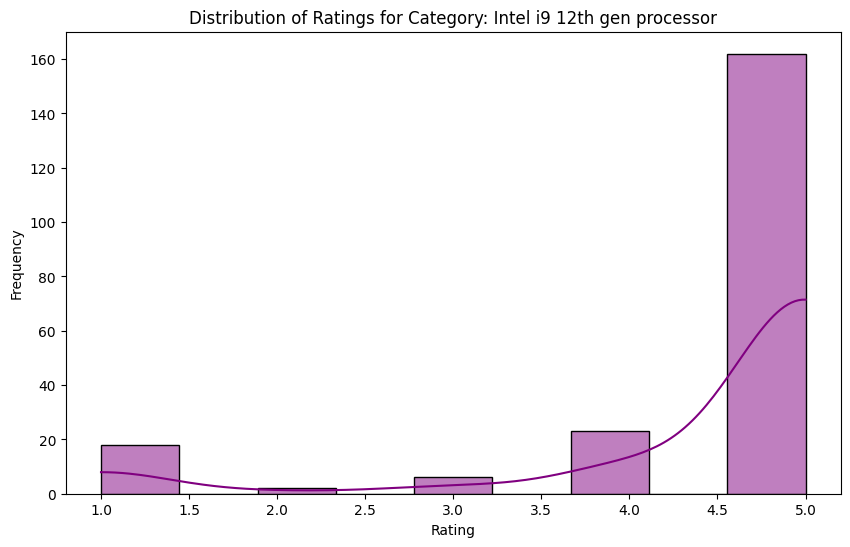

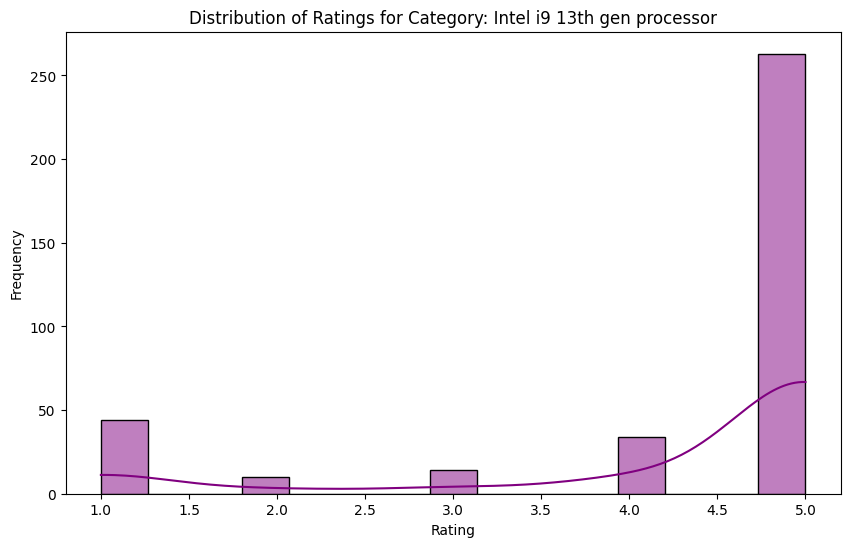

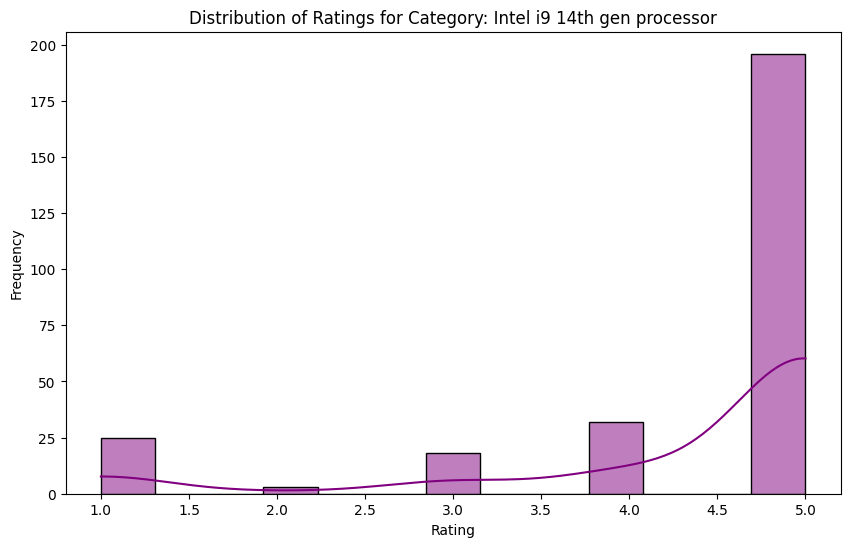

In [42]:
# Iterate over unique categories and create separate charts
for category, data in df_aspects.groupby('category'):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['rating'], kde=True, color='purple')
    plt.title(f'Distribution of Ratings for Category: {category}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

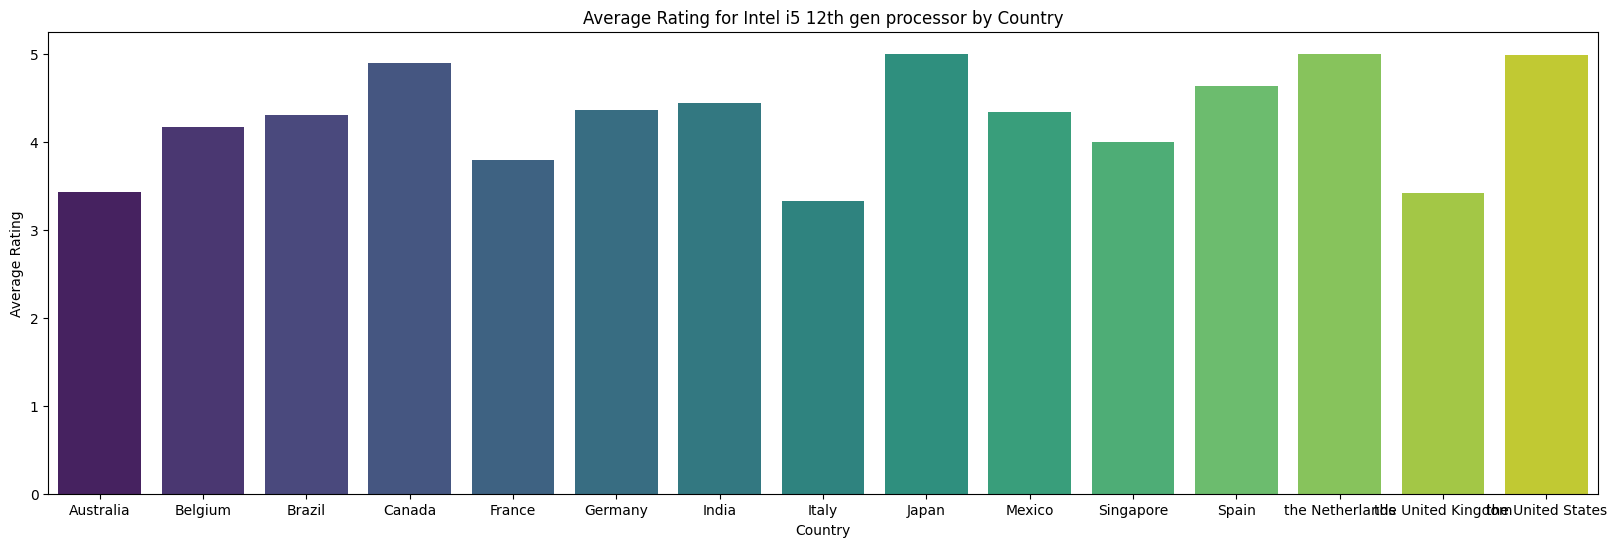

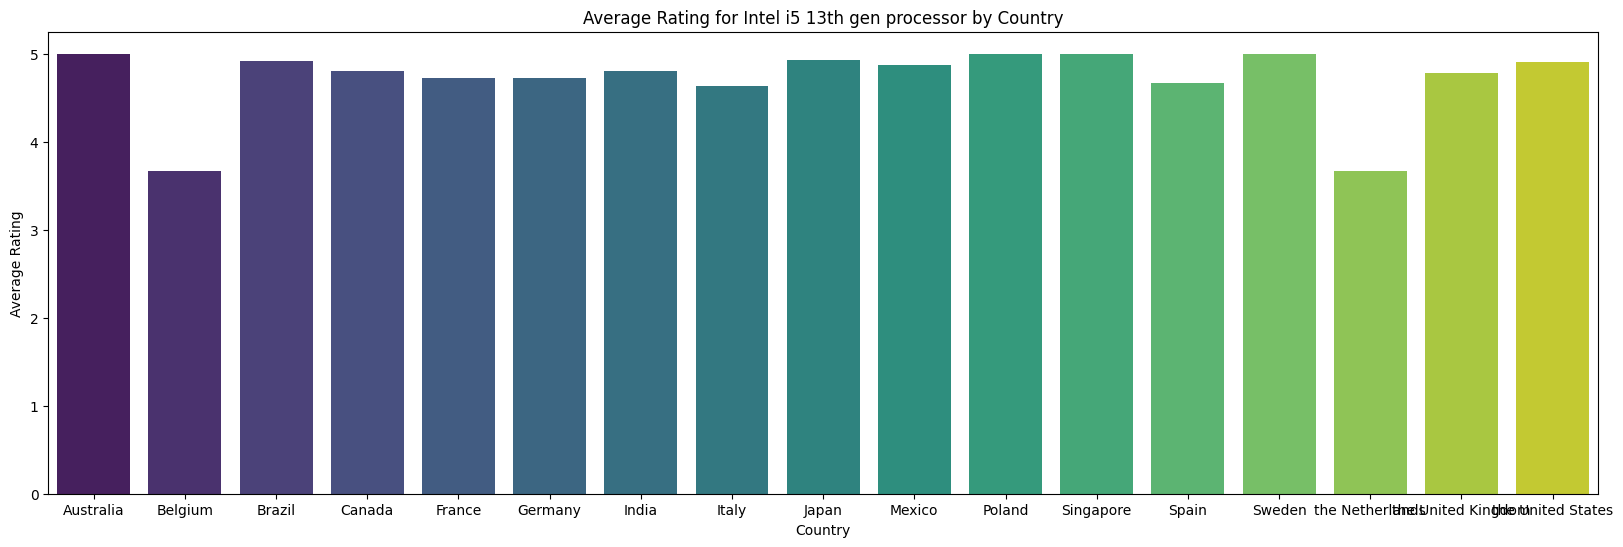

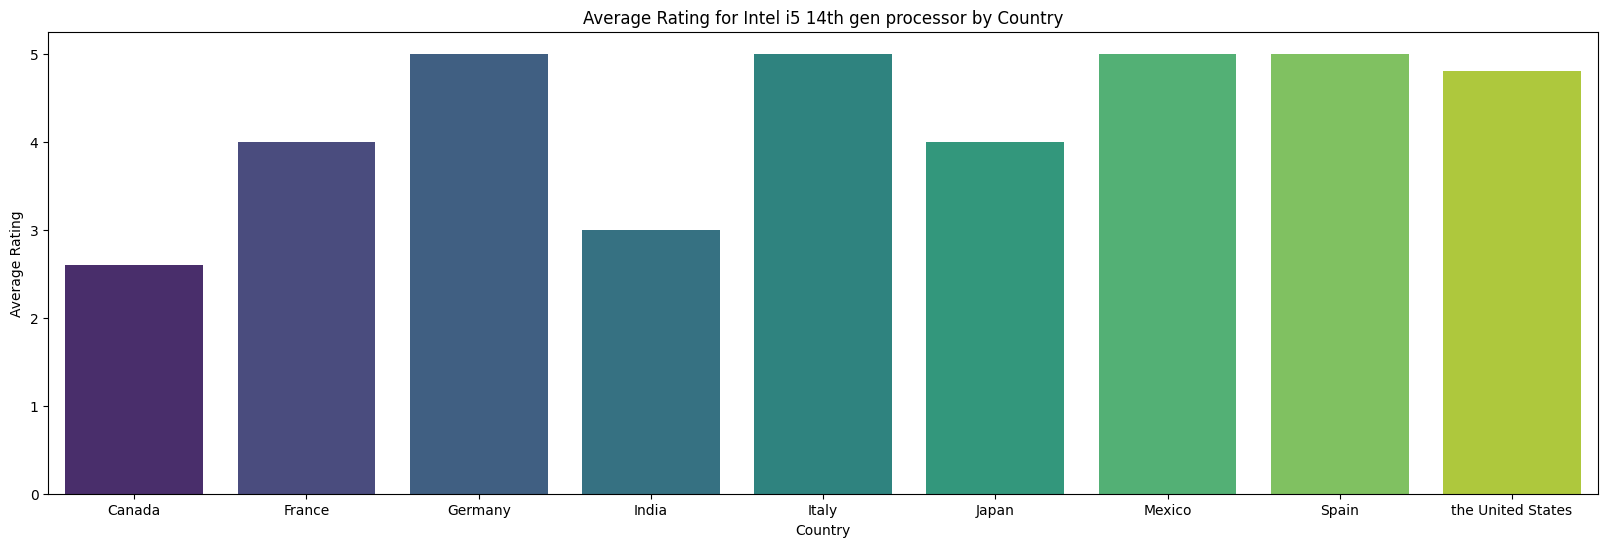

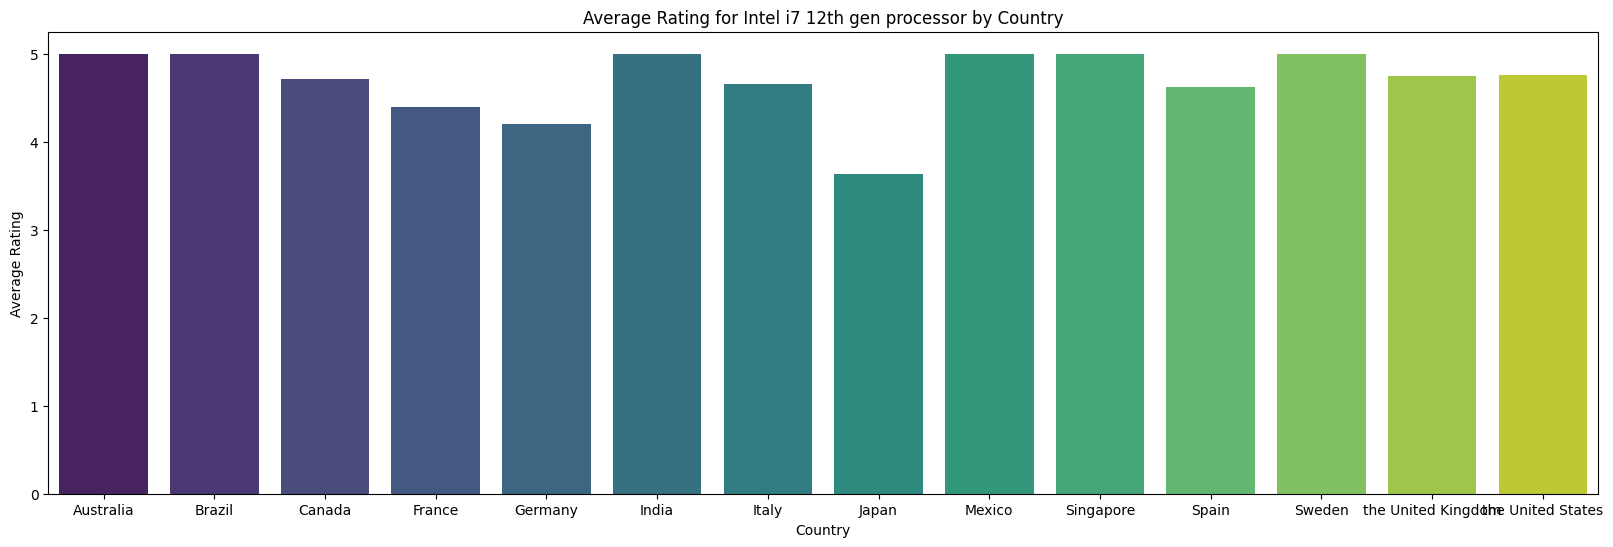

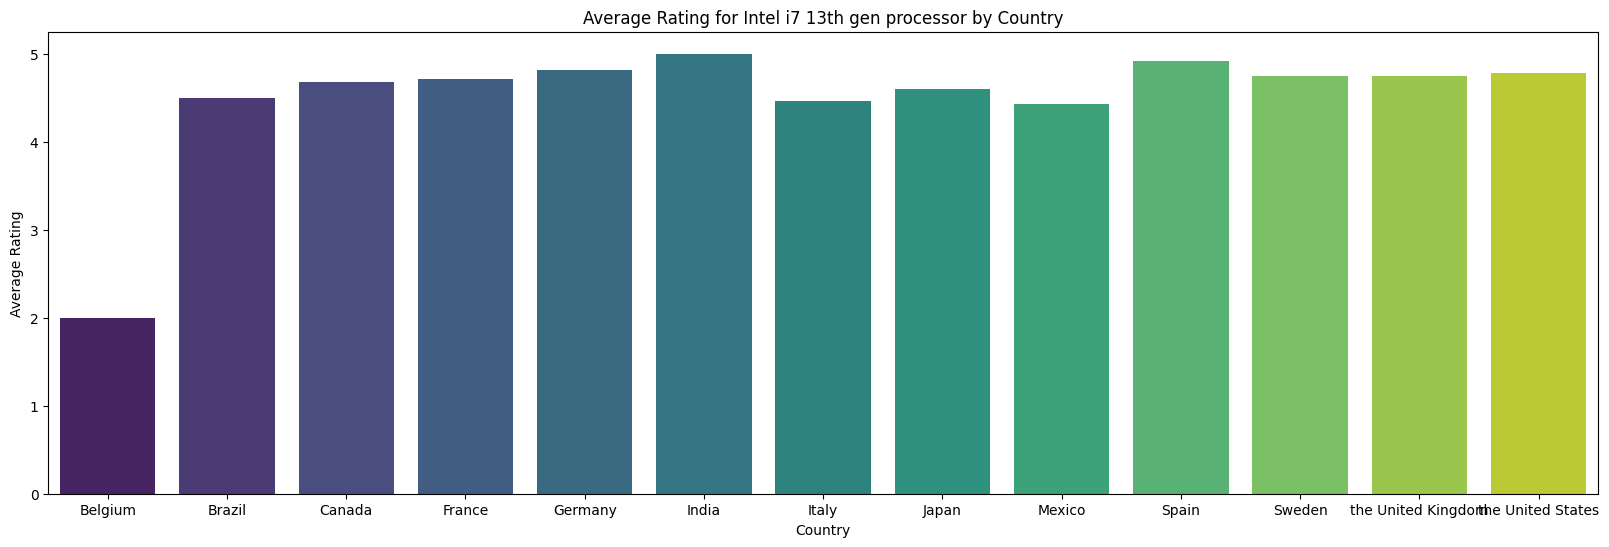

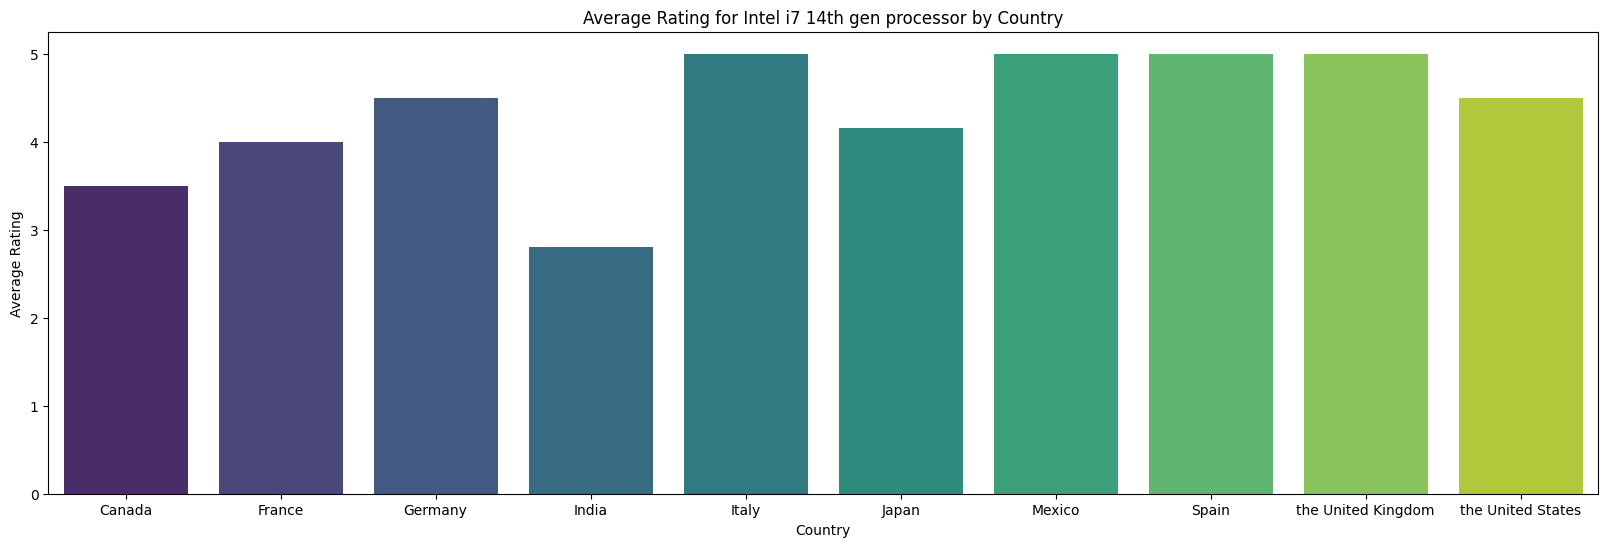

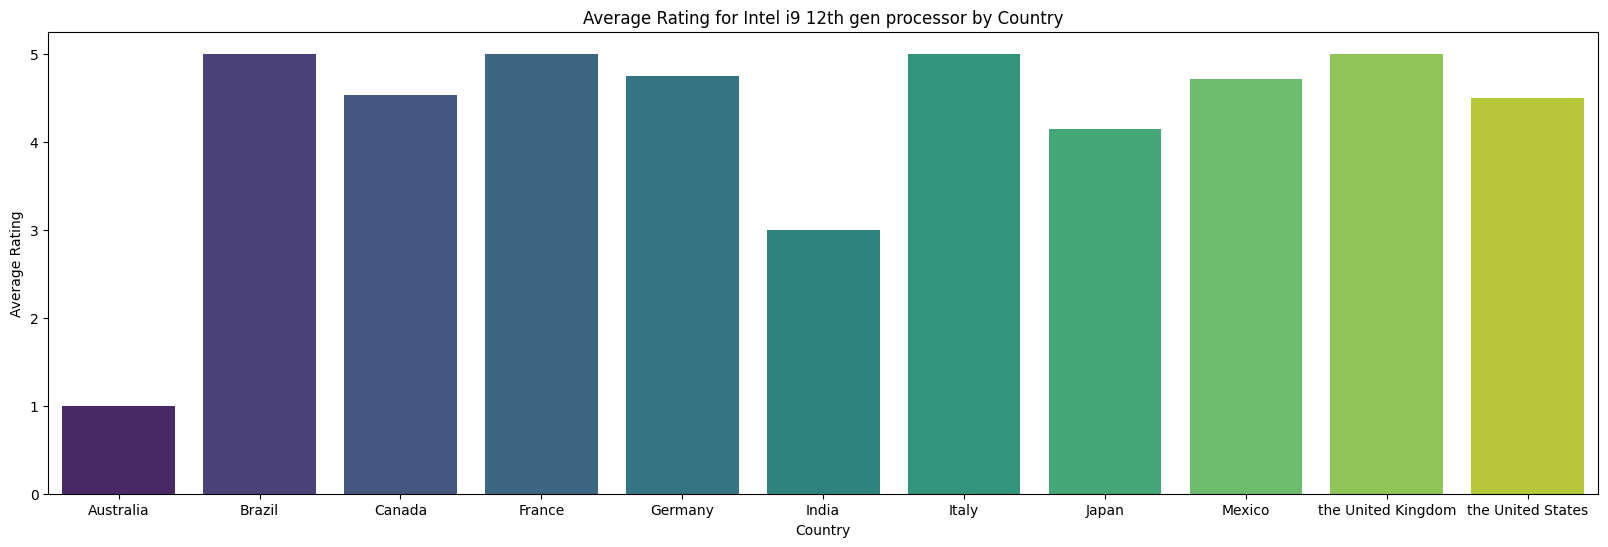

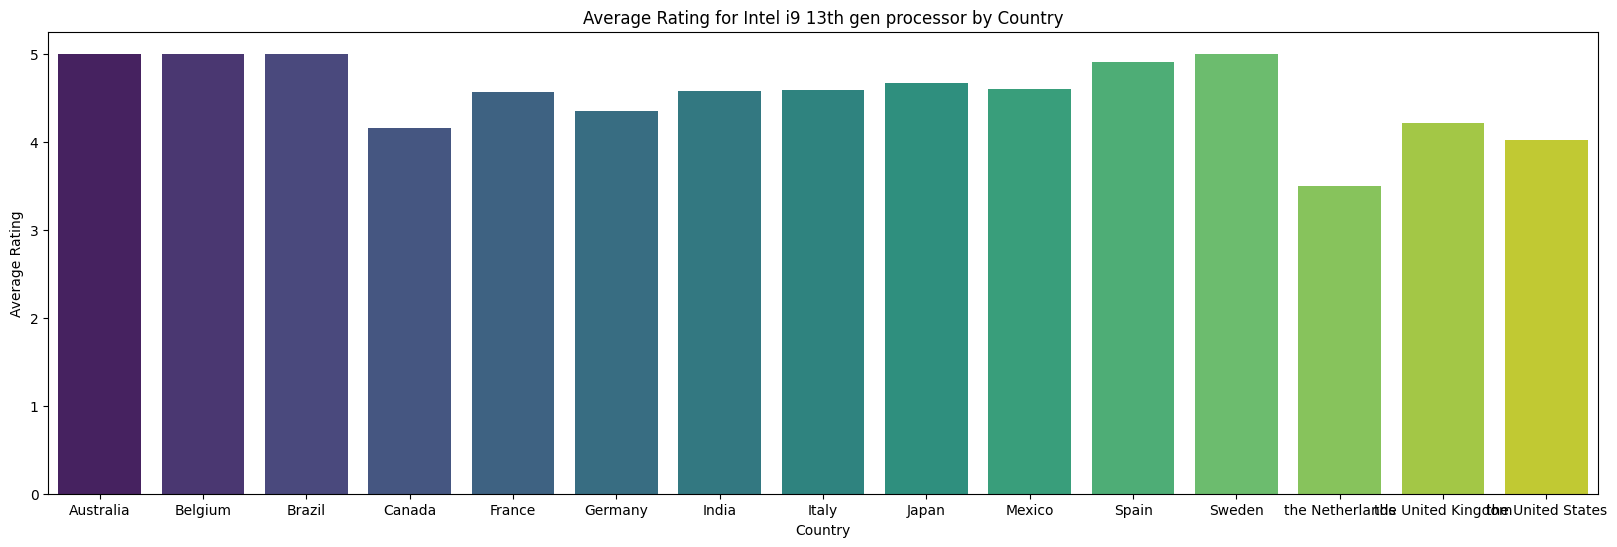

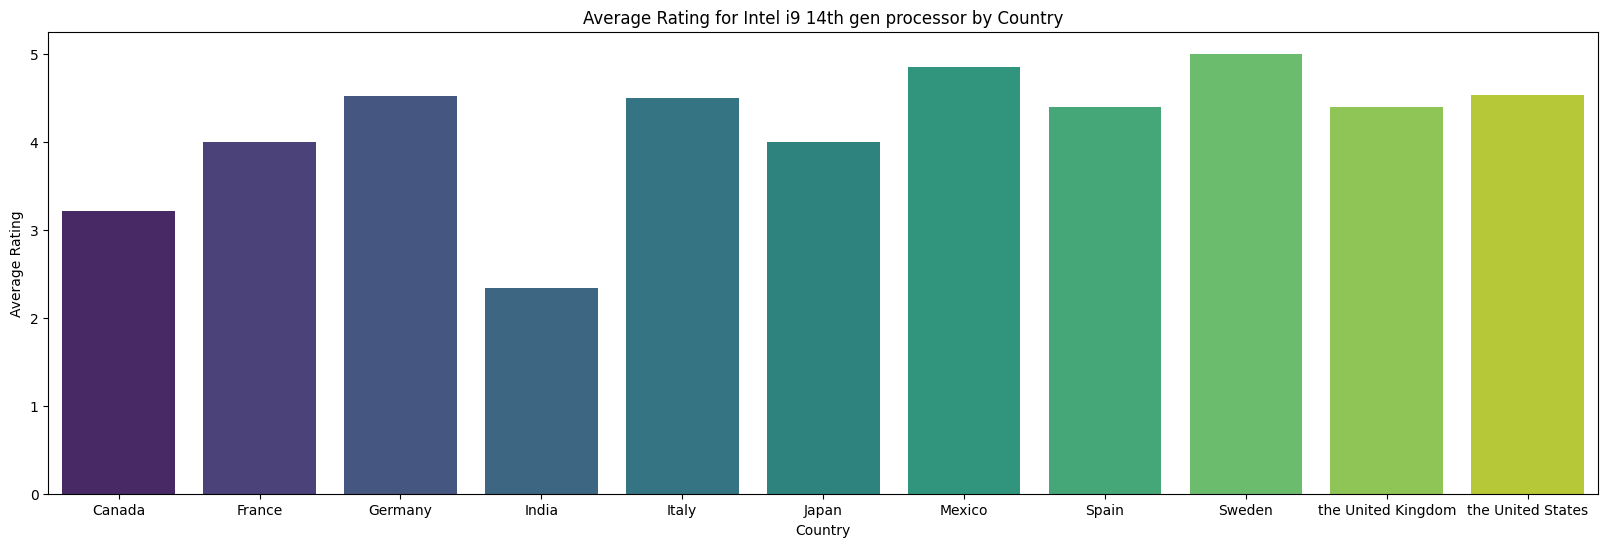

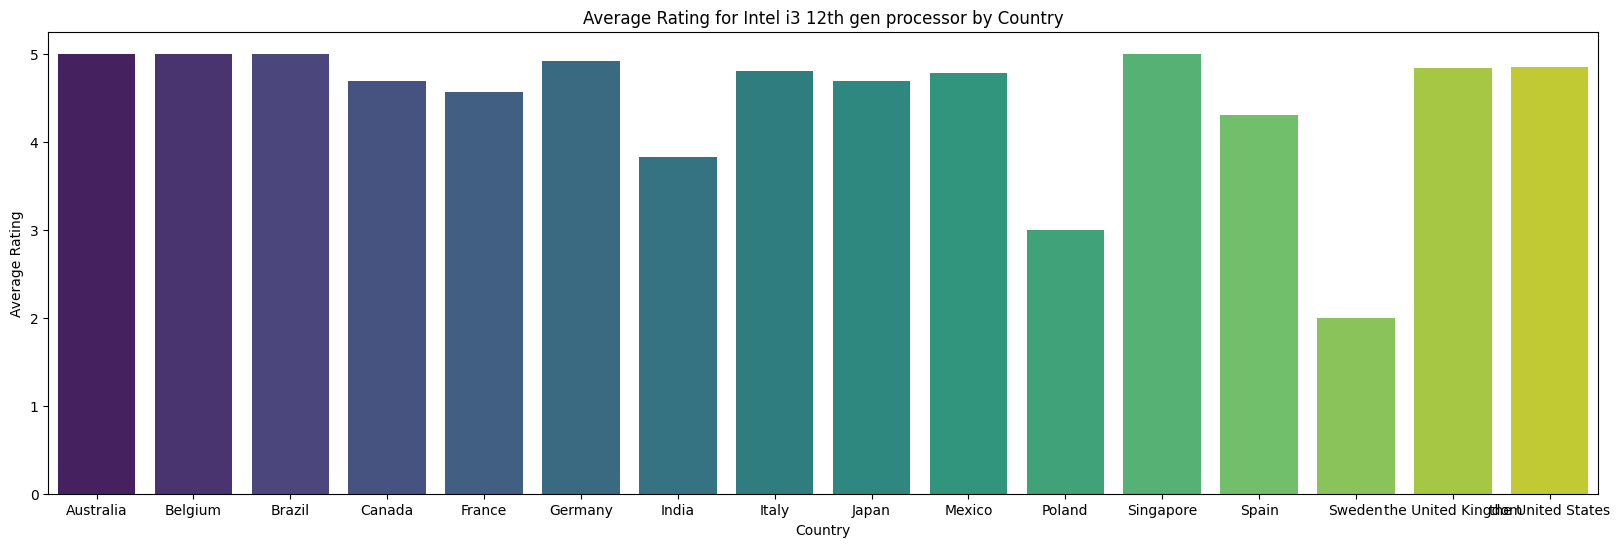

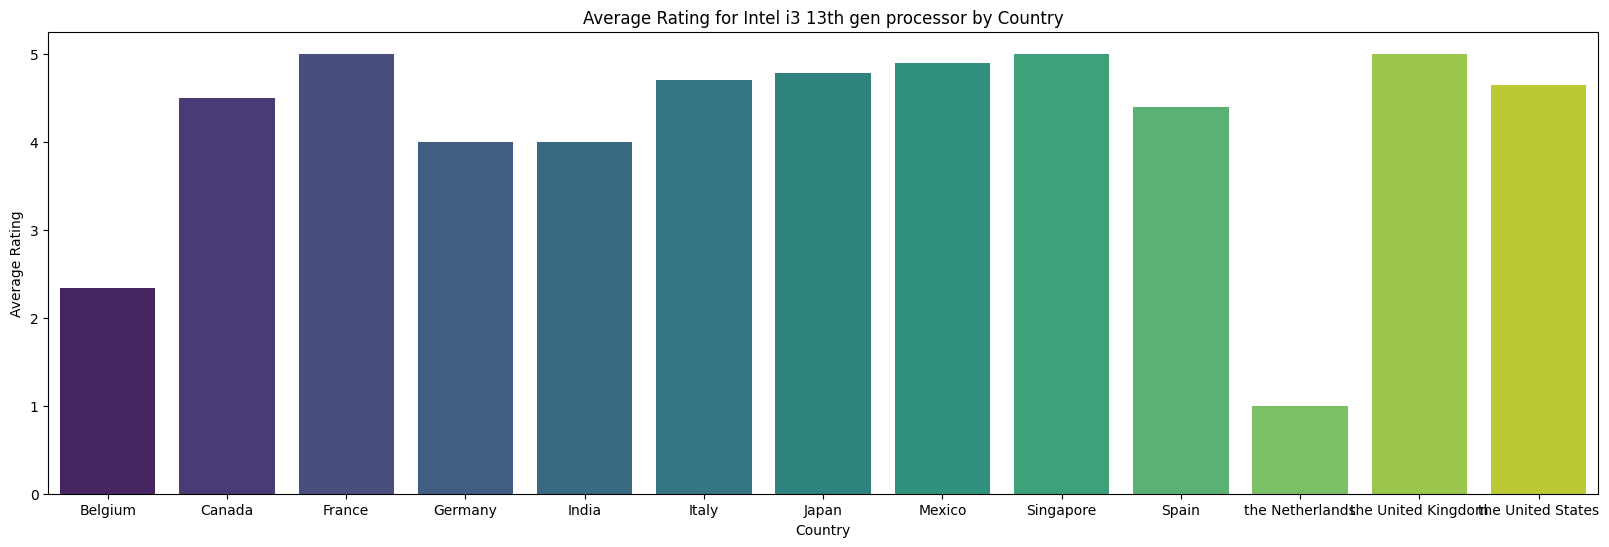

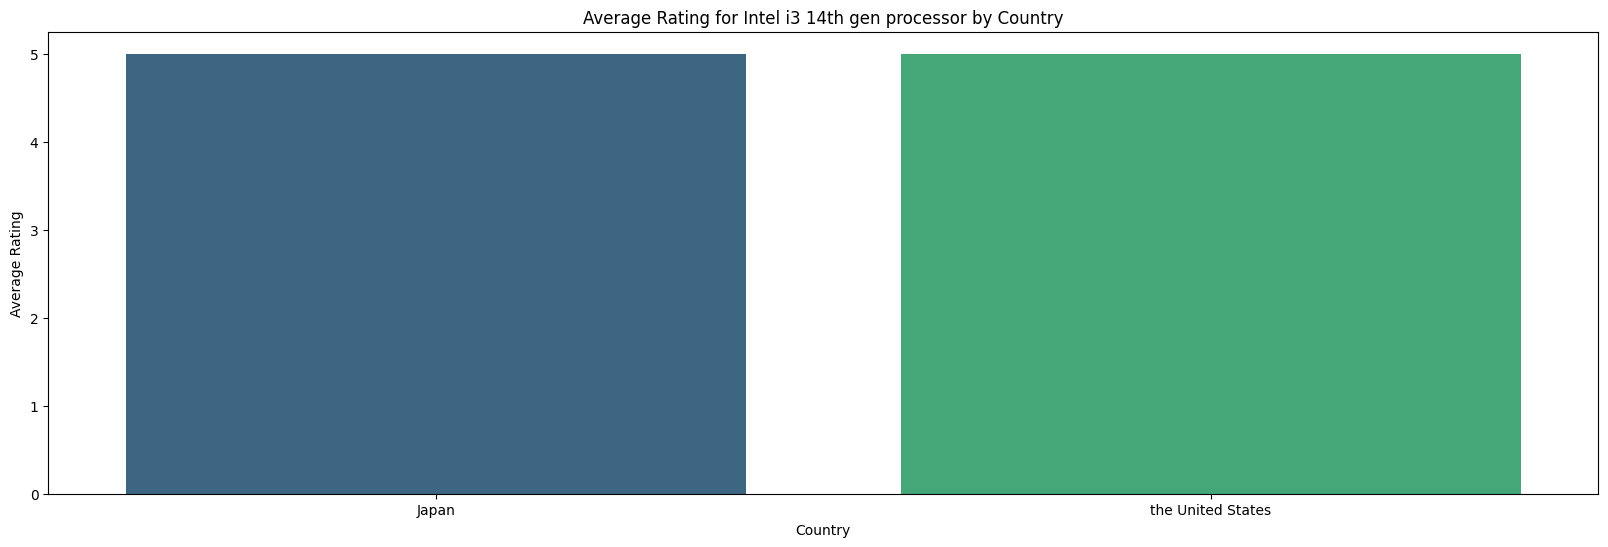

In [45]:
# Convert 'date' to datetime format
df_aspects['date'] = pd.to_datetime(df_aspects['date'], format='%d/%m/%Y')

# Convert 'rating' to numeric
df_aspects['rating'] = pd.to_numeric(df_aspects['rating'])

# Get unique categories
categories = df_aspects['category'].unique()

# Plotting separate bar charts for each category
for category in categories:
    category_df = df_aspects[df_aspects['category'] == category]
    average_ratings = category_df.groupby('country').rating.mean().reset_index()
    
    plt.figure(figsize=(20, 6))
    sns.barplot(x='country', y='rating', data=average_ratings, palette='viridis', hue='country', legend=False)
    plt.xlabel('Country')
    plt.ylabel('Average Rating')
    plt.title(f'Average Rating for {category} by Country')
    plt.show()

In [50]:
df_aspects.head()

,customer_name,rating,review_text,product_name,date,country,sentiment,category,year,aspect,aspect_sentiment,keyfeature
0,ARUN,5.0,the processor was very power efficient i devel...,Intel Core I5 12400F 12 Gen Generation Desktop...,2024-04-24,India,Positive,Intel i5 12th gen processor,2024,"[processor, power, android, apps, web, develop...","[Neutral, Neutral, Neutral, Neutral, Neutral, ...",processor
1,Ayush,5.0,try to get it under k and check the rankings i...,Intel Core I5 12400F 12 Gen Generation Desktop...,2024-05-14,India,Neutral,Intel i5 12th gen processor,2024,"[k, rankings, details, sections]","[Neutral, Neutral, Neutral, Neutral]",k
2,Hruaia,5.0,i upgrade from f the performance gain is a hug...,Intel Core I5 12400F 12 Gen Generation Desktop...,2024-03-24,India,Positive,Intel i5 12th gen processor,2024,"[f, performance, gain, cooler, master, hyper, ...","[Neutral, Neutral, Positive, Neutral, Neutral,...",cpu
3,Yavvari,4.0,this will not work without graphic card so be ...,Intel Core I5 12400F 12 Gen Generation Desktop...,2024-02-18,India,Positive,Intel i5 12th gen processor,2024,"[graphic, card]","[Neutral, Neutral]",card
4,Mr.GeAr,5.0,best gaming and multitasking processor at the ...,Intel Core I5 12400F 12 Gen Generation Desktop...,2024-04-07,India,Positive,Intel i5 12th gen processor,2024,"[gaming, processor, price, k, budget, pc, k]","[Neutral, Neutral, Neutral, Neutral, Neutral, ...",processor


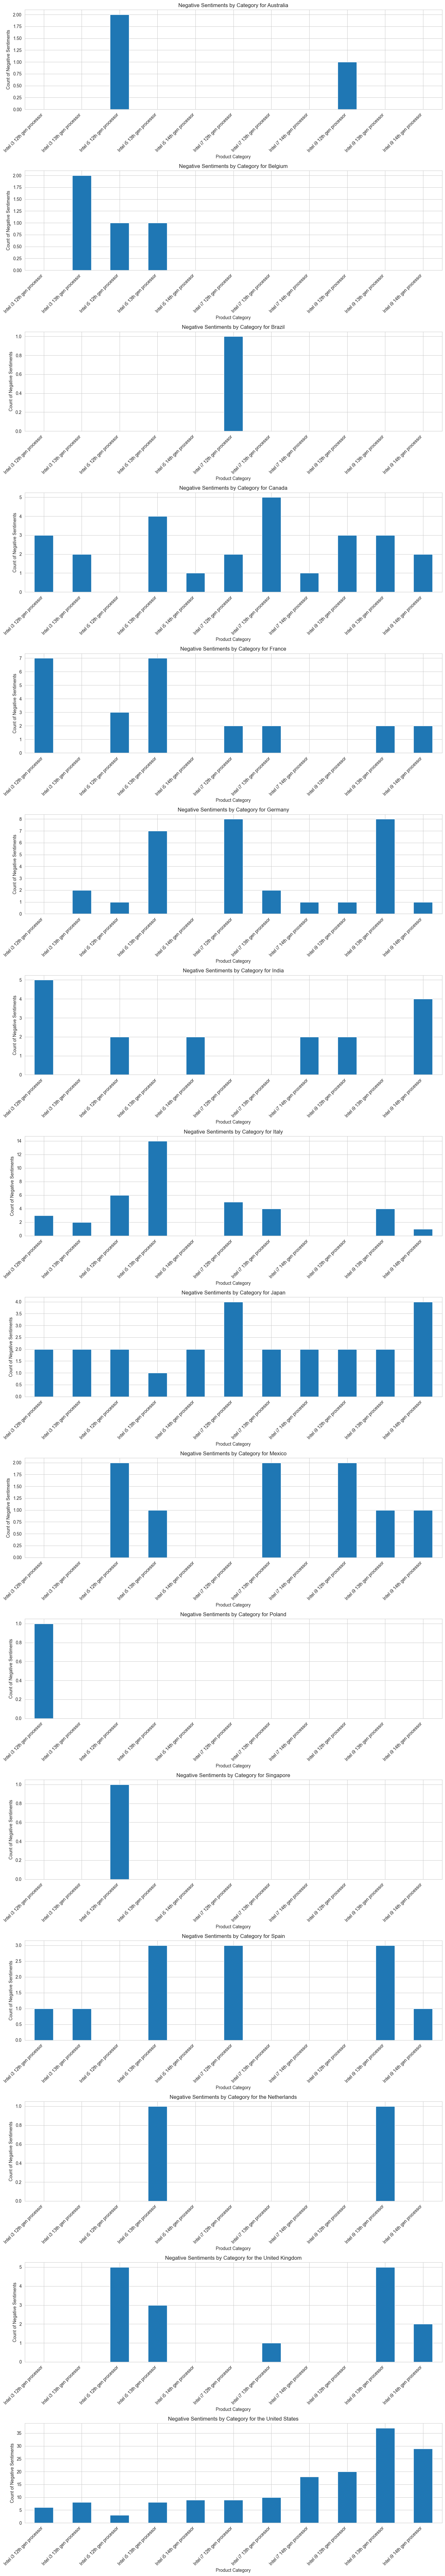

In [52]:
# Assuming df is your DataFrame
# Filter the DataFrame to include only negative sentiments
negative_sentiments = df_aspects[df_aspects['sentiment'] == 'Negative']

# Group by country and category, and count the occurrences of negative sentiment
negative_sentiment_counts = negative_sentiments.groupby(['country', 'category']).size().unstack(fill_value=0)

# Plot the data for each country
fig, axes = plt.subplots(nrows=len(negative_sentiment_counts.index), ncols=1, figsize=(14, len(negative_sentiment_counts.index) * 5))

# Adjusting the subplot structure for single country
if len(negative_sentiment_counts.index) == 1:
    axes = [axes]

for ax, country in zip(axes, negative_sentiment_counts.index):
    negative_sentiment_counts.loc[country].plot(kind='bar', ax=ax)
    ax.set_title(f'Negative Sentiments by Category for {country}')
    ax.set_xlabel('Product Category')
    ax.set_ylabel('Count of Negative Sentiments')
    ax.set_xticklabels(negative_sentiment_counts.columns, rotation=45, ha='right')

# Adjust layout for better fit
plt.tight_layout()
plt.show()